In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


## Import data

In [2]:
df = pd.read_csv('Final_Balanced_Cleaned_Car Accident Dataset.csv')
df

,Day_of_Week,Junction_Control,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Hour,Minute,Accident_Severity
0,1,3,0.539929,4,321,0.388342,0.000000,0.000000,0,3,0.833333,0,1,0.260870,0.508475,3
1,1,4,0.090052,4,116,0.597126,0.000000,0.064516,4,3,0.833333,0,1,0.347826,0.813559,3
2,1,5,0.032547,4,88,0.262809,0.000000,0.000000,0,3,0.333333,1,1,0.478261,0.813559,3
3,3,5,0.337348,1,406,0.521226,0.000000,0.000000,2,3,0.333333,1,1,0.826087,0.440678,3
4,0,4,0.155597,1,160,0.794396,0.000000,0.032258,4,3,0.333333,1,3,0.826087,0.101695,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171011,5,3,0.237787,4,287,0.663465,0.021277,0.032258,4,3,0.333333,0,1,0.521739,0.677966,2
171012,0,4,0.168574,1,334,0.770316,0.000000,0.032258,0,4,1.000000,0,1,0.826087,0.491525,2
171013,4,5,0.361220,4,124,0.786760,0.000000,0.000000,0,3,0.833333,0,1,0.695652,0.593220,2
171014,3,5,0.178027,1,143,0.541700,0.000000,0.032258,4,3,0.333333,0,1,0.869565,0.169492,2


In [3]:
# Train/Validation - validate split
X = df
X, X_test = train_test_split(X, test_size=.3, random_state=42)
sample = X
x_value = sample.drop('Accident_Severity', axis=1)
y_value = sample['Accident_Severity']
# Chia dữ liệu với nhãn mới
X_train, X_validate, y_train, y_validate = train_test_split(x_value, y_value, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(83797, 15) (83797,)
(35914, 15) (35914,)


# Decision tree

In [4]:
dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters scores:
{'criterion': 'entropy', 'max_depth': 30}
Train score: 0.9970643340453715
Validation score: 0.9291641142729855


In [5]:
print("Default scores:")
dtc.fit(X_train, y_train)
print("Train score:", dtc.score(X_train, y_train))
print("Validation score:", dtc.score(X_validate, y_validate))

Default scores:
Train score: 0.9999880663985584
Validation score: 0.9310296820181545


In [6]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.735826,0.062000,0.009967,0.002771,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.914439,0.918675,0.918372,0.915031,0.912405,0.915785,0.002402,1
3,0.786640,0.243038,0.013391,0.008766,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.916229,0.913544,0.914136,0.917537,0.913778,0.915045,0.001568,2
2,0.539161,0.162156,0.008779,0.003303,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.822792,0.822196,0.824691,0.824632,0.826660,0.824194,0.001580,3
6,0.883394,0.199773,0.008453,0.001002,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.806026,0.805549,0.808401,0.818545,0.809416,0.809588,0.004705,4
1,0.385898,0.057389,0.008382,0.000922,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.717243,0.714379,0.723910,0.714541,0.725819,0.719179,0.004791,5
5,0.559412,0.174429,0.015305,0.007872,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.701492,0.698687,0.712990,0.704457,0.710245,0.705574,0.005332,6
0,0.221813,0.045022,0.006702,0.000548,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.616945,0.619093,0.618712,0.613223,0.622352,0.618065,0.002985,7
4,0.272909,0.081885,0.009921,0.006253,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.614976,0.617482,0.617638,0.613044,0.614834,0.615595,0.001744,8


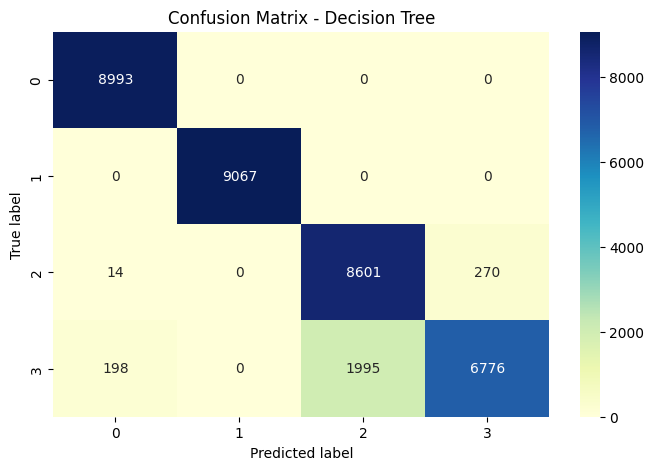

In [7]:
y_pred = dtc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

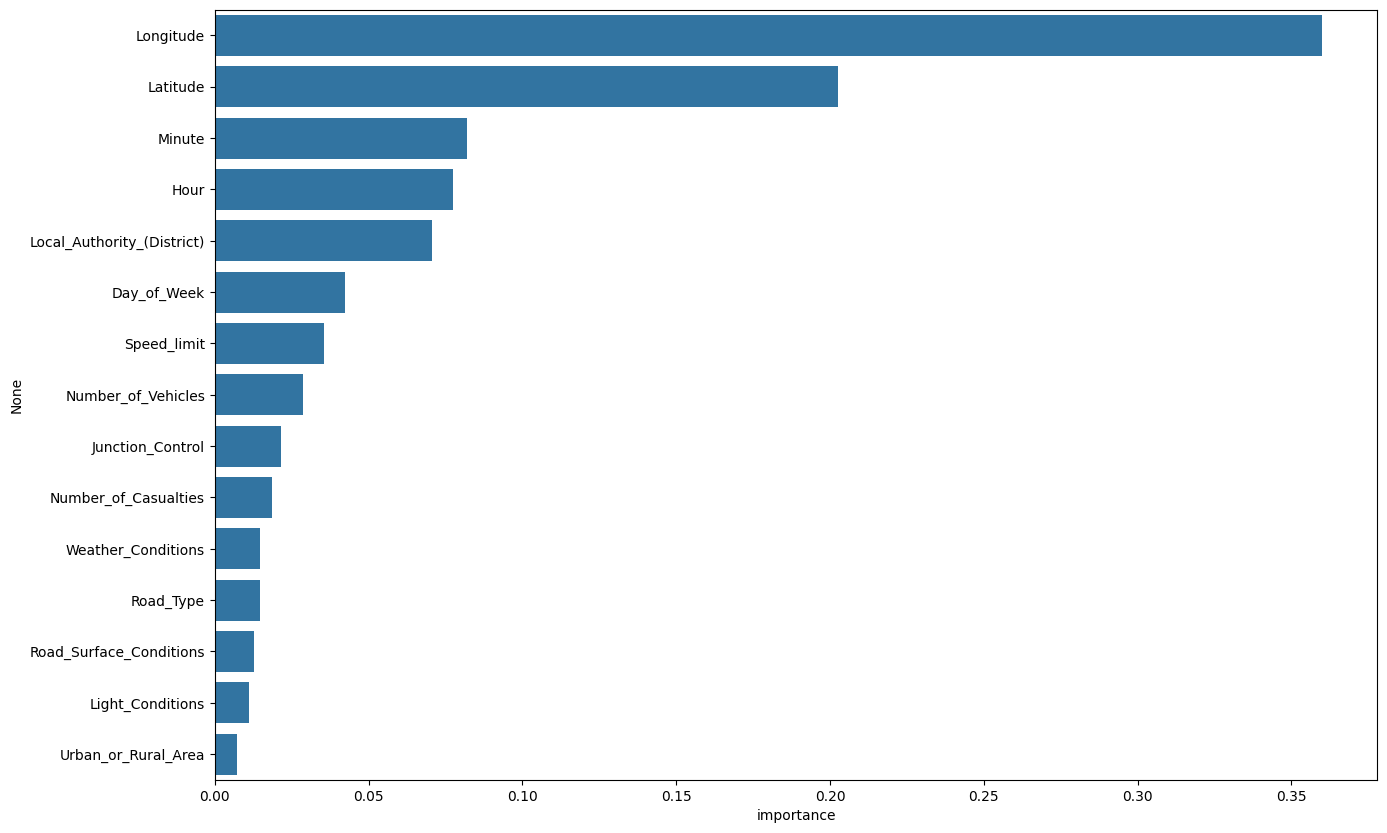

In [8]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = dtc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

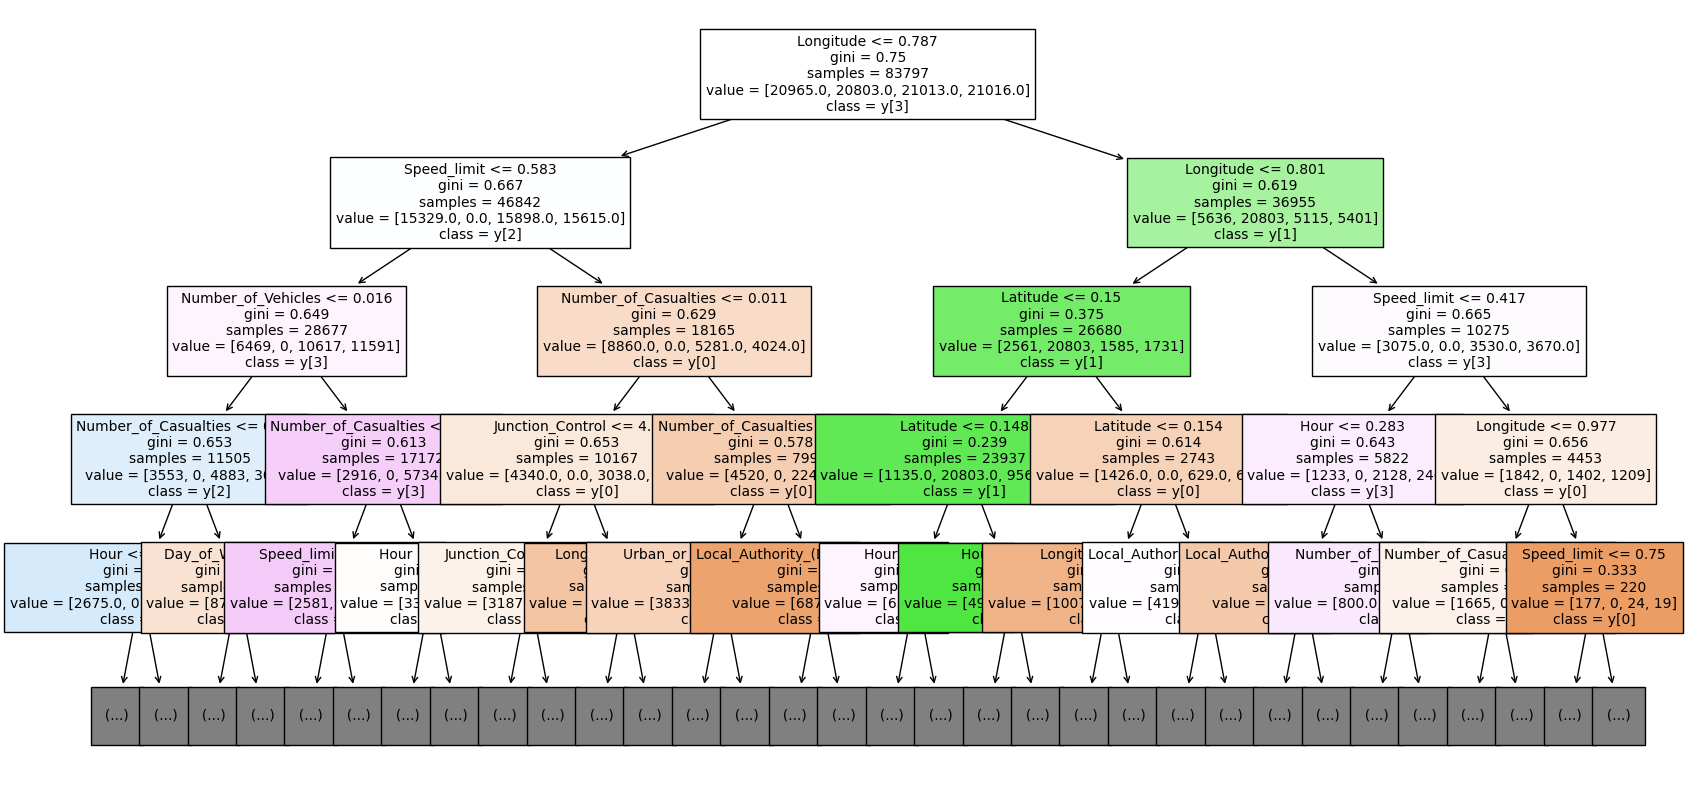

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dtc, max_depth=4, fontsize=10, feature_names=X_train.columns.to_list(), class_names = True, filled=True)
plt.show()

## Algorithms Evaluation

In [10]:
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [11]:
y_pred = dtc.predict(X_validate)

accuracy["Decision Tree"] = accuracy_score(y_validate, y_pred)
f1["Decision Tree"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20965
           1       1.00      1.00      1.00     20803
           2       1.00      1.00      1.00     21013
           3       1.00      1.00      1.00     21016

    accuracy                           1.00     83797
   macro avg       1.00      1.00      1.00     83797
weighted avg       1.00      1.00      1.00     83797

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8993
           1       1.00      1.00      1.00      9067
           2       0.81      0.97      0.88      8885
           3       0.96      0.76      0.85      8969

    accuracy                           0.93     35914
   macro avg       0.94      0.93      0.93     35914
weighted avg       0.94      0.93      0.93     35914



In [12]:
print(classification_report(y_train, dtc.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20965
           1       1.00      1.00      1.00     20803
           2       1.00      1.00      1.00     21013
           3       1.00      1.00      1.00     21016

    accuracy                           1.00     83797
   macro avg       1.00      1.00      1.00     83797
weighted avg       1.00      1.00      1.00     83797



In [13]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8993
           1       1.00      1.00      1.00      9067
           2       0.81      0.97      0.88      8885
           3       0.96      0.76      0.85      8969

    accuracy                           0.93     35914
   macro avg       0.94      0.93      0.93     35914
weighted avg       0.94      0.93      0.93     35914



### Accuracy - Decision Tree

In [14]:
accuracy["Decision Tree"] = accuracy_score(y_validate, y_pred)
print("Accuracy - Decision Tree: ", accuracy["Decision Tree"])

Accuracy - Decision Tree:  0.9310296820181545


### F1-Score - Recall - Precision - Decision Tree

In [15]:
f1["Decision Tree"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - Decision Tree: ", f1["Decision Tree"])
print("precision - Decision Tree: ", precisionScore)
print("recall - Decision Tree: ", recallScore)

f1-Score - Decision Tree:  0.9293928170978165
precision - Decision Tree:  0.9375927072260342
recall - Decision Tree:  0.9308817879731179


Draw PR (Precision - Recall) Curve - Decision Tree

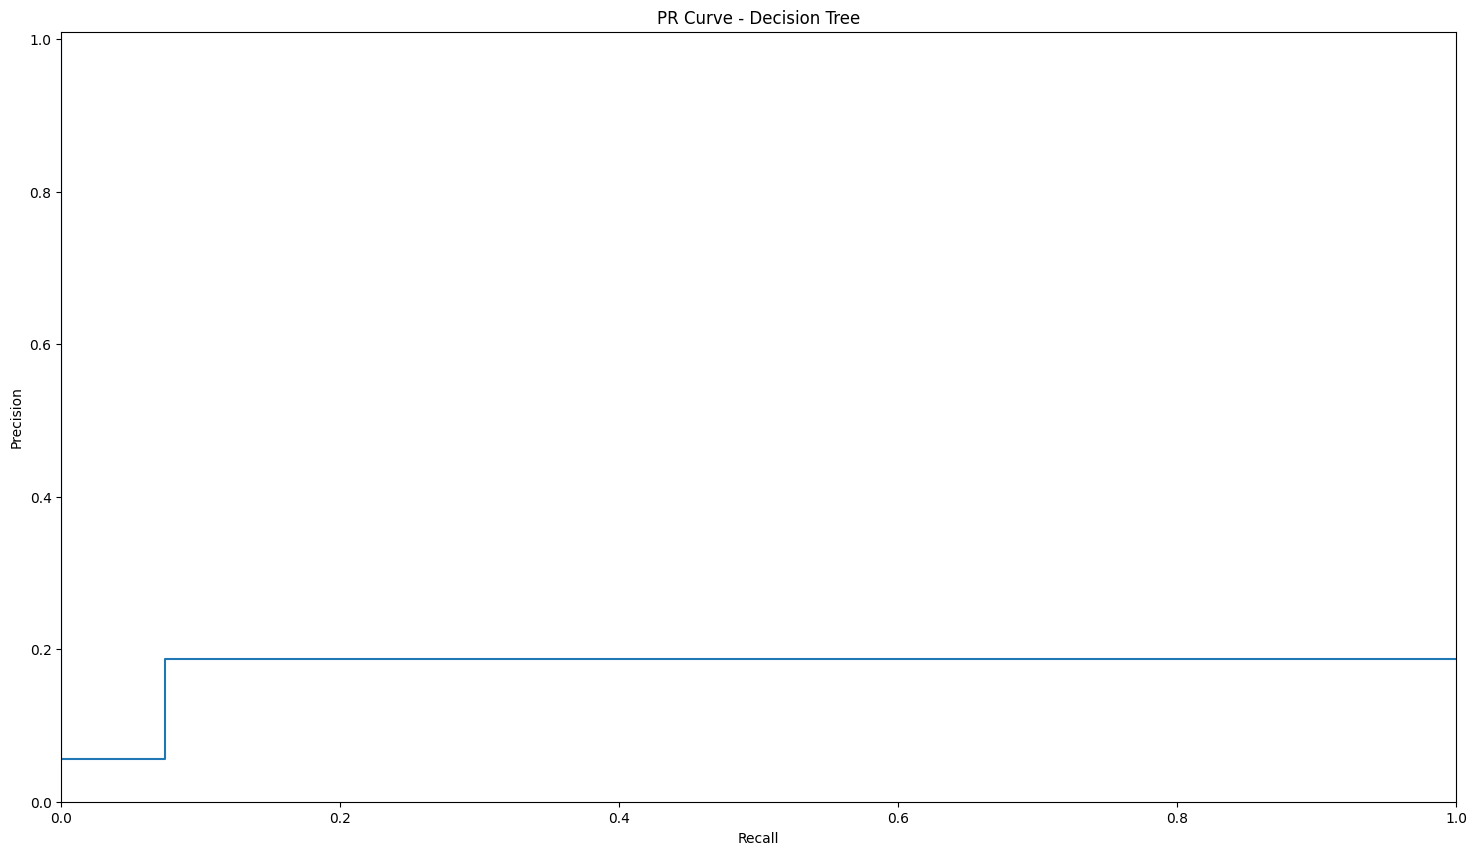

In [16]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = dtc.predict_proba(X_validate)

precision["Decision Tree"], recall["Decision Tree"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Decision Tree"], precision["Decision Tree"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Decision Tree")
plt.show()

### ROC curve - Decision Tree

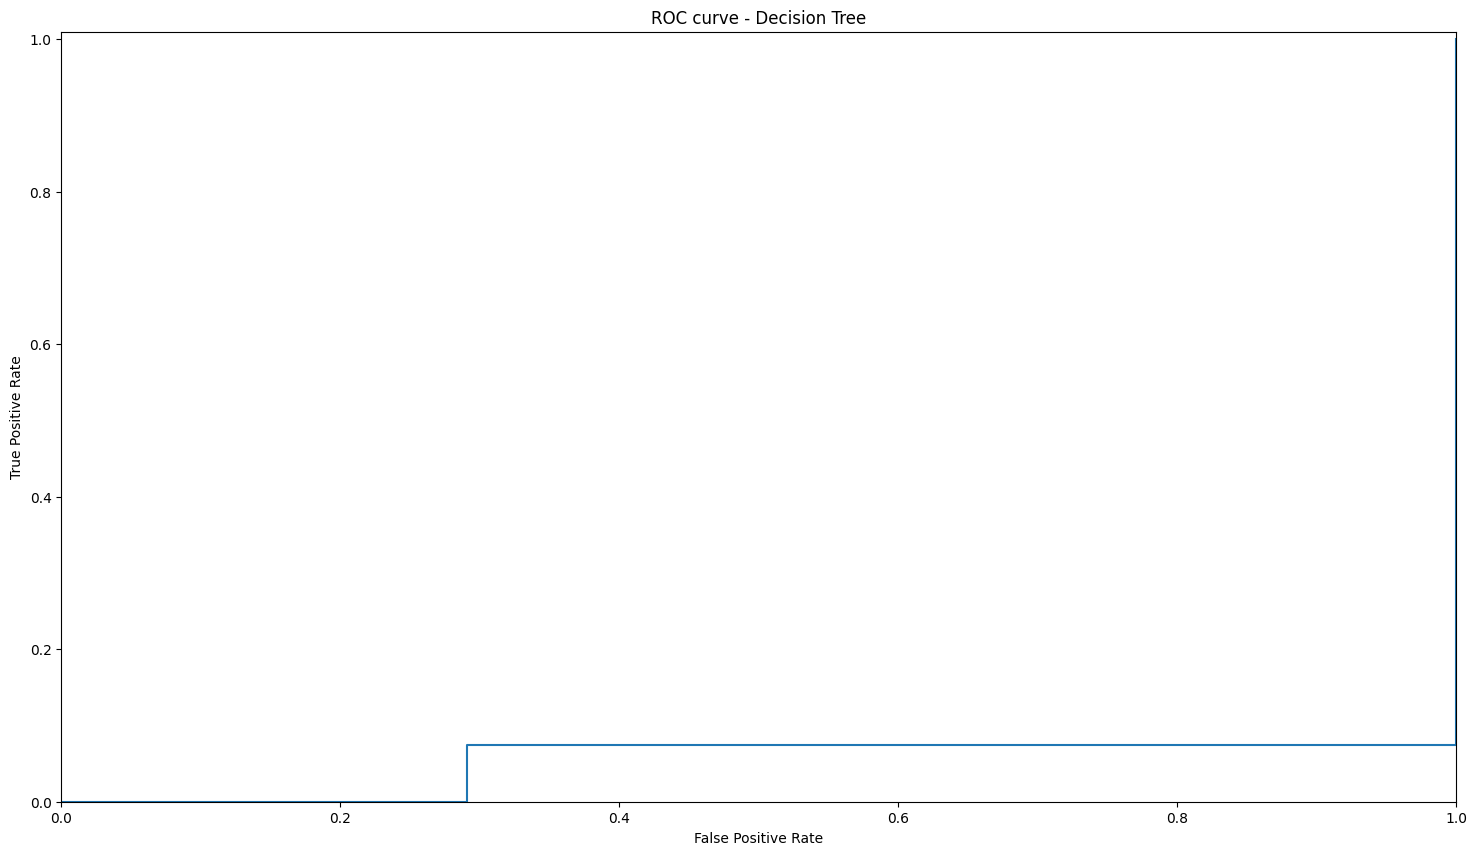

In [17]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = dtc.predict_proba(X_validate)

fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Decision Tree"], tpr["Decision Tree"], where="post")

plt.title("ROC curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

# Gaussian Naive Bayes

## Built and predict - Gaussian Naive Bayes

In [18]:
from datetime import timedelta
import time
gnb_start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_end_time = time.time()
gnb_time = gnb_end_time - gnb_start_time
print("Train score:", gnb.score(X_train, y_train))
print("Validation score:", gnb.score(X_validate, y_validate))
print("Time is: ", timedelta(seconds=round(gnb_time,4)))


Train score: 0.5371672016897979
Validation score: 0.5389263239962132
Time is:  0:00:00.039600


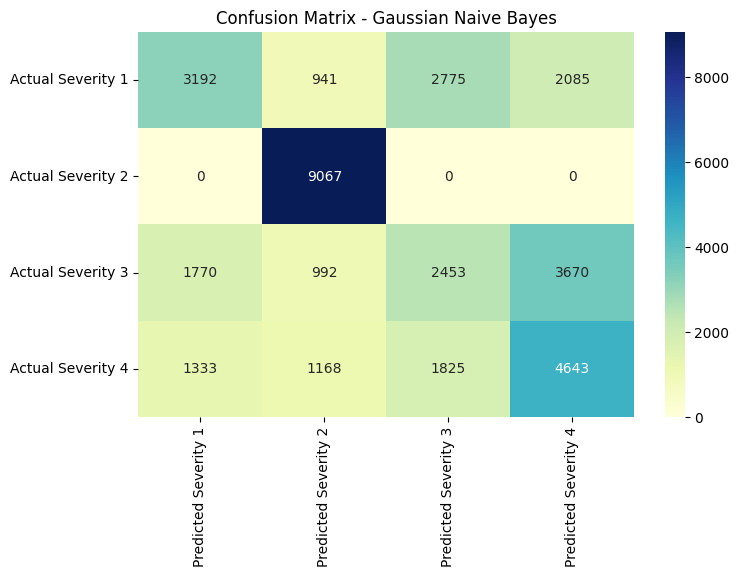

In [19]:
y_pred = gnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

## Algorithms Evaluation - Gaussian Naive Bayes

In [20]:
y_pred = gnb.predict(X_validate)

accuracy["Gaussian Naive Bayes"] = accuracy_score(y_validate, y_pred)
f1["Gaussian Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, gnb.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.36      0.42     20965
           1       0.74      1.00      0.85     20803
           2       0.35      0.28      0.31     21013
           3       0.45      0.51      0.48     21016

    accuracy                           0.54     83797
   macro avg       0.51      0.54      0.52     83797
weighted avg       0.51      0.54      0.51     83797

              precision    recall  f1-score   support

           0       0.51      0.35      0.42      8993
           1       0.75      1.00      0.85      9067
           2       0.35      0.28      0.31      8885
           3       0.45      0.52      0.48      8969

    accuracy                           0.54     35914
   macro avg       0.51      0.54      0.51     35914
weighted avg       0.51      0.54      0.52     35914



In [21]:
print(classification_report(y_train, gnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.51      0.36      0.42     20965
           1       0.74      1.00      0.85     20803
           2       0.35      0.28      0.31     21013
           3       0.45      0.51      0.48     21016

    accuracy                           0.54     83797
   macro avg       0.51      0.54      0.52     83797
weighted avg       0.51      0.54      0.51     83797



In [22]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.35      0.42      8993
           1       0.75      1.00      0.85      9067
           2       0.35      0.28      0.31      8885
           3       0.45      0.52      0.48      8969

    accuracy                           0.54     35914
   macro avg       0.51      0.54      0.51     35914
weighted avg       0.51      0.54      0.52     35914



### Accuracy -  Gaussian Naive Bayes

In [23]:
accuracy["Gaussian Naive Bayes"] = accuracy_score(y_validate, y_pred)
print("Accuracy - Gaussian Naive Bayes: ", accuracy["Gaussian Naive Bayes"])

Accuracy - Gaussian Naive Bayes:  0.5389263239962132


### F1-Score - Recall - Precision - Gaussian Naive Bayes

In [24]:
f1["Gaussian Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - Gaussian Naive Bayes: ", f1["Gaussian Naive Bayes"])
print("precision - Gaussian Naive Bayes: ", precisionScore)
print("recall - Gaussian Naive Bayes: ", recallScore)

f1-Score - Gaussian Naive Bayes:  0.5147107785754503
precision - Gaussian Naive Bayes:  0.511635940422421
recall - Gaussian Naive Bayes:  0.5371745002358983


Draw PR (Precision - Recall) Curve - Gaussian Naive Bayes

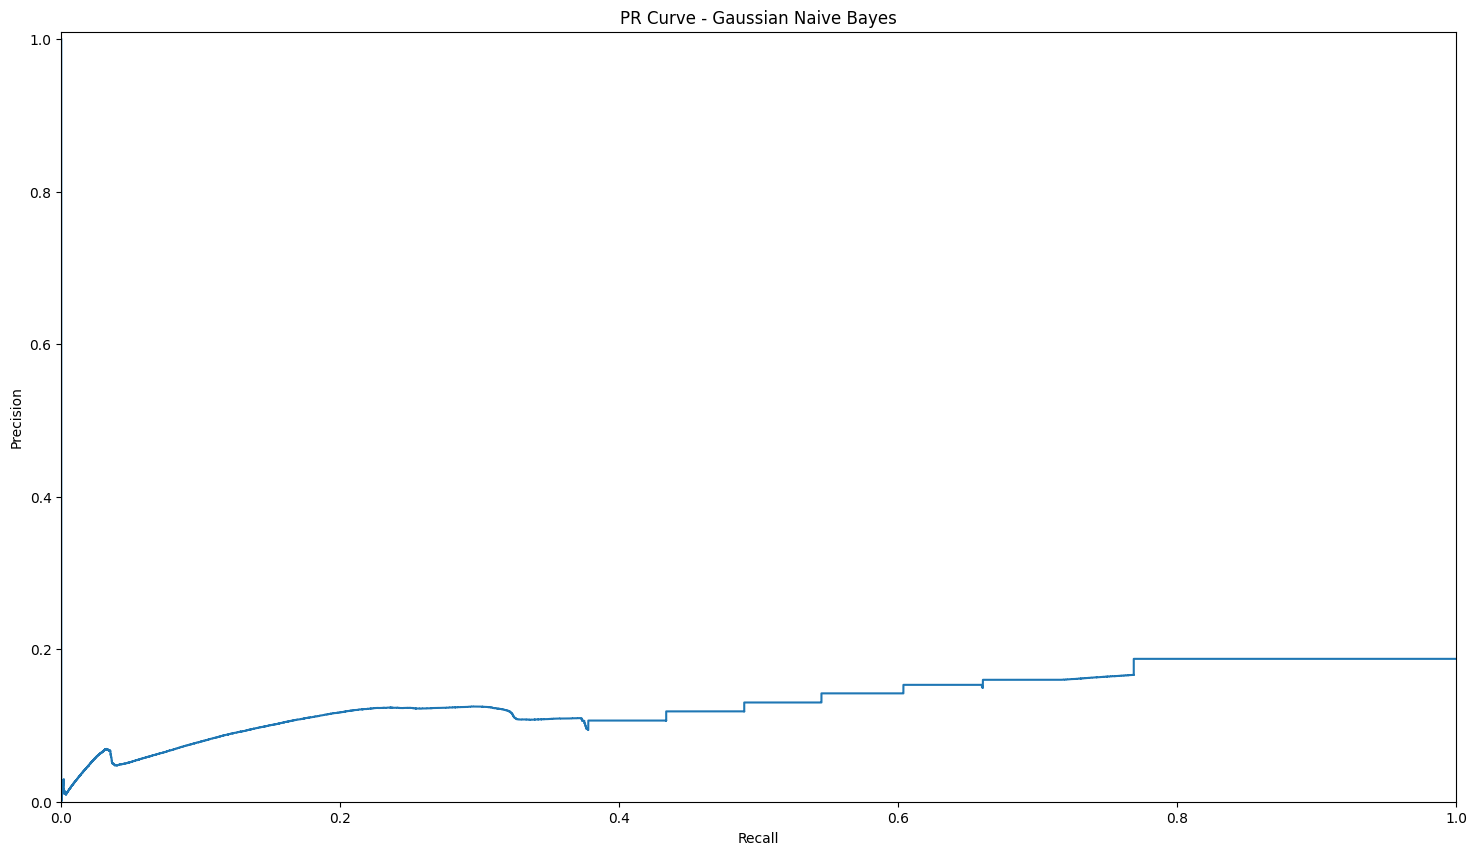

In [25]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = gnb.predict_proba(X_validate)

precision["Gaussian Naive Bayes"], recall["Gaussian Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Gaussian Naive Bayes"], precision["Gaussian Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Gaussian Naive Bayes")
plt.show()

### ROC curve - Gaussian Naive Bayes

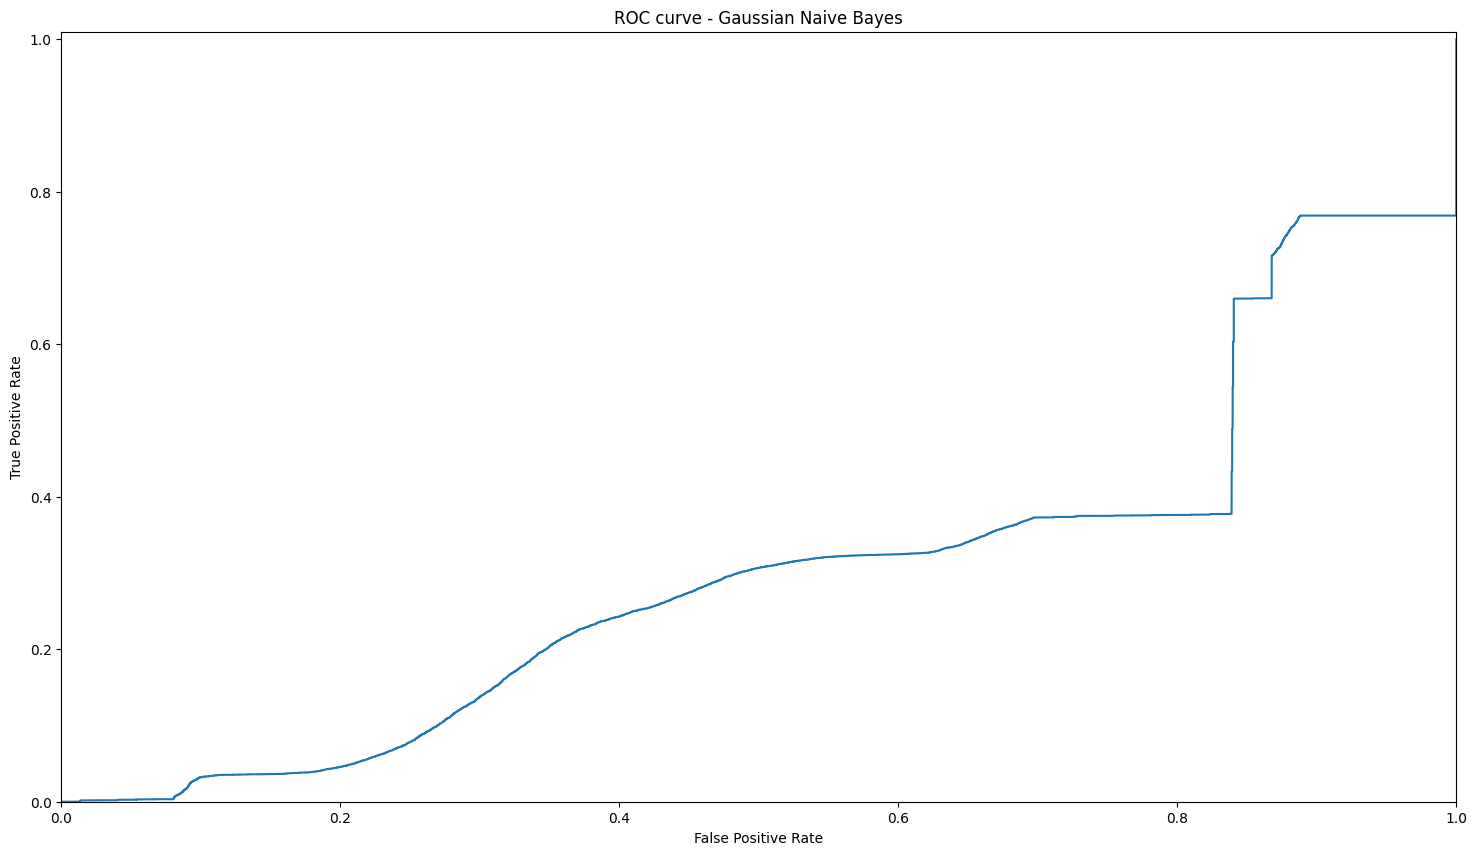

In [26]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = gnb.predict_proba(X_validate)

fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], where="post")

plt.title("ROC curve - Gaussian Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

## Built and predict - Multinomial Naive Bayes

In [27]:
mnb_start_time = time.time()
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_end_time = time.time()
mnb_time = mnb_end_time - mnb_start_time

print("Train score:", mnb.score(X_train, y_train))
print("Validation score:", mnb.score(X_validate, y_validate))
print("Time is: ", timedelta(seconds=round(mnb_time,4)))

Train score: 0.3226010477702066
Validation score: 0.31865010859274934
Time is:  0:00:00.027100


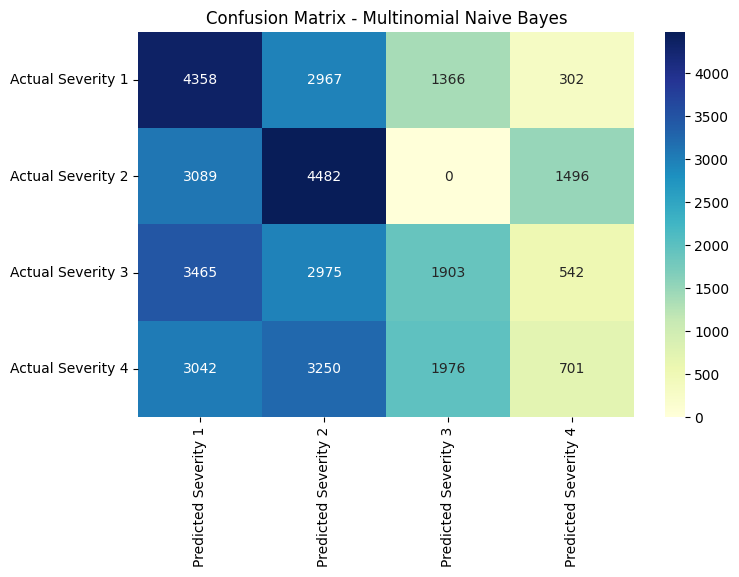

In [28]:
y_pred = mnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.show()

## Algorithms Evaluation - Multinomial Naive Bayes

In [29]:
y_pred = mnb.predict(X_validate)

accuracy["Multinomial Naive Bayes"] = accuracy_score(y_validate, y_pred)
f1["Multinomial Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, mnb.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.49      0.39     20965
           1       0.33      0.50      0.39     20803
           2       0.38      0.22      0.28     21013
           3       0.23      0.08      0.12     21016

    accuracy                           0.32     83797
   macro avg       0.31      0.32      0.29     83797
weighted avg       0.31      0.32      0.29     83797

              precision    recall  f1-score   support

           0       0.31      0.48      0.38      8993
           1       0.33      0.49      0.39      9067
           2       0.36      0.21      0.27      8885
           3       0.23      0.08      0.12      8969

    accuracy                           0.32     35914
   macro avg       0.31      0.32      0.29     35914
weighted avg       0.31      0.32      0.29     35914



In [30]:
print(classification_report(y_train, mnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.32      0.49      0.39     20965
           1       0.33      0.50      0.39     20803
           2       0.38      0.22      0.28     21013
           3       0.23      0.08      0.12     21016

    accuracy                           0.32     83797
   macro avg       0.31      0.32      0.29     83797
weighted avg       0.31      0.32      0.29     83797



In [31]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.48      0.38      8993
           1       0.33      0.49      0.39      9067
           2       0.36      0.21      0.27      8885
           3       0.23      0.08      0.12      8969

    accuracy                           0.32     35914
   macro avg       0.31      0.32      0.29     35914
weighted avg       0.31      0.32      0.29     35914



### Accuracy -  Multinomial Naive Bayes

In [32]:
accuracy["Multinomial Naive Bayes"] = accuracy_score(y_validate, y_pred)
print("Accuracy - Multinomial Naive Bayes: ", accuracy["Multinomial Naive Bayes"])

Accuracy - Multinomial Naive Bayes:  0.31865010859274934


### F1-Score - Recall - Precision - Multinomial Naive Bayes

In [33]:
f1["Multinomial Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - Multinomial Naive Bayes: ", f1["Multinomial Naive Bayes"])
print("precision - Multinomial Naive Bayes: ", precisionScore)
print("recall - Multinomial Naive Bayes: ", recallScore)

f1-Score - Multinomial Naive Bayes:  0.2900254340753723
precision - Multinomial Naive Bayes:  0.3083563086212694
recall - Multinomial Naive Bayes:  0.31781462470517136


Draw PR (Precision - Recall) Curve - Multinomial Naive Bayes

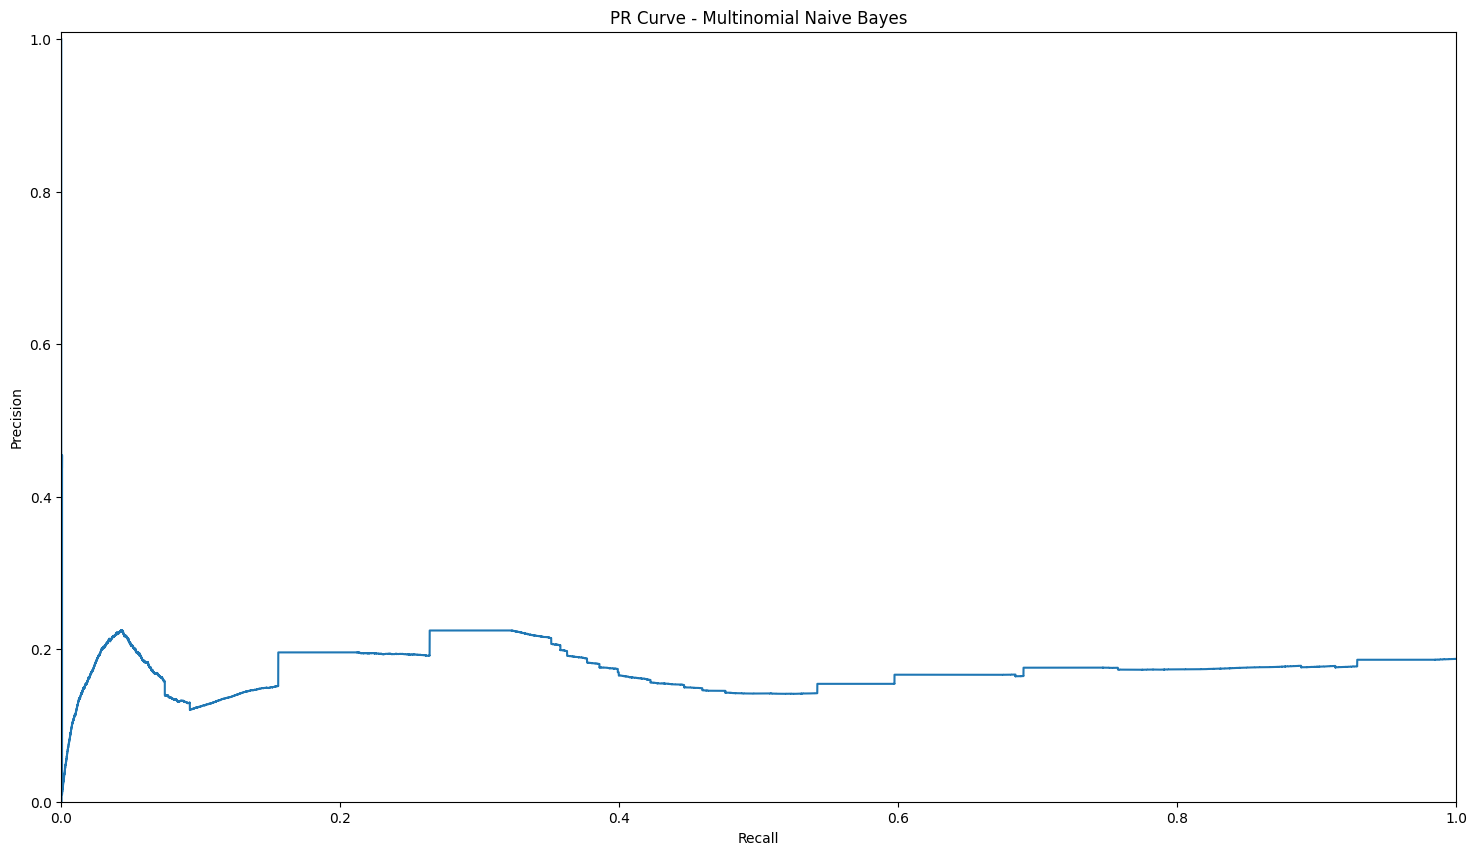

In [34]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = mnb.predict_proba(X_validate)

precision["Multinomial Naive Bayes"], recall["Multinomial Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Multinomial Naive Bayes"], precision["Multinomial Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Multinomial Naive Bayes")
plt.show()

### ROC curve - Multinomial Naive Bayes

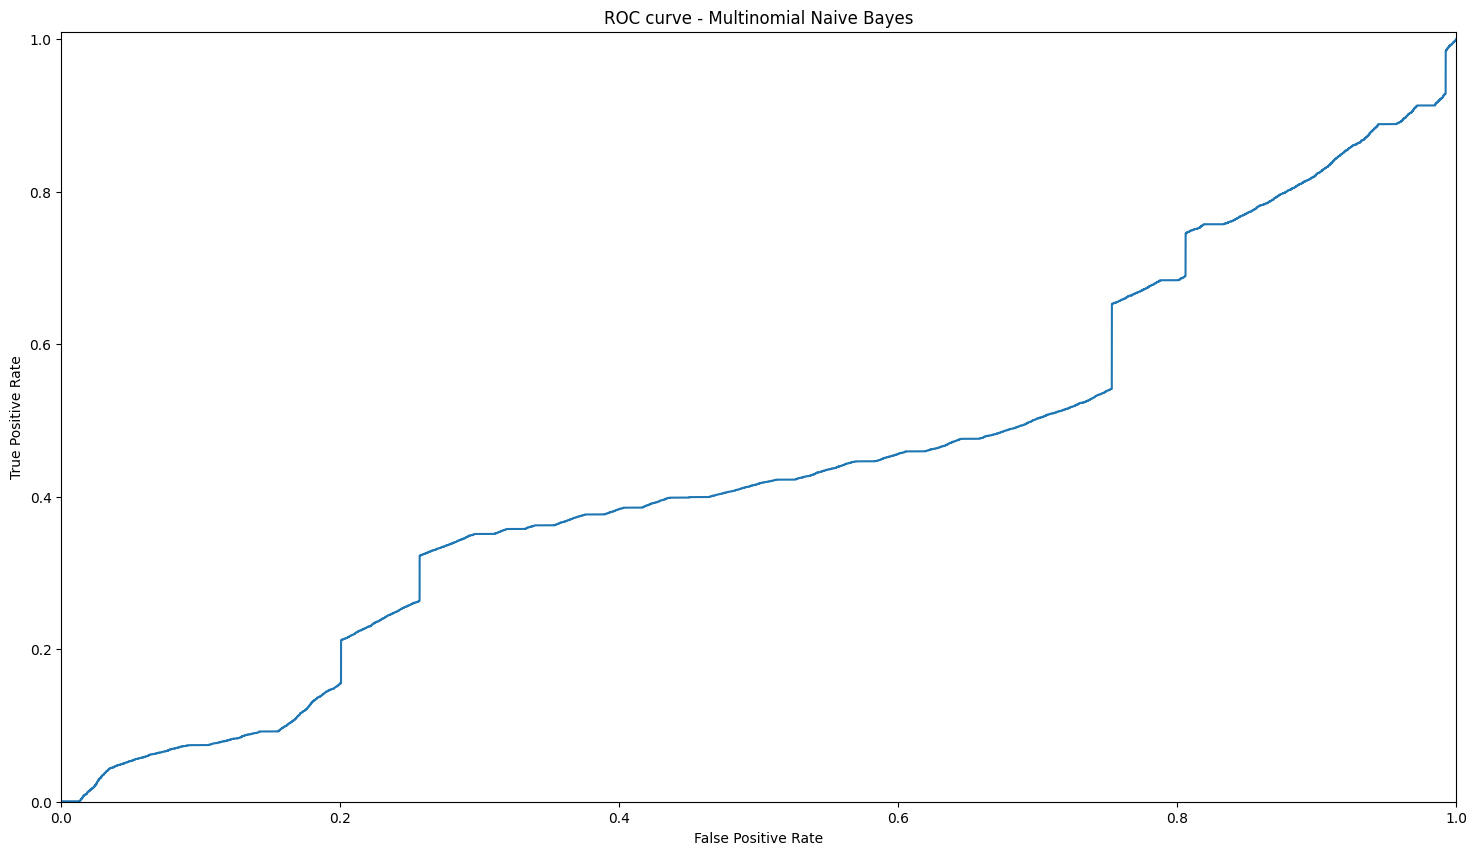

In [35]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = mnb.predict_proba(X_validate)

fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], where="post")

plt.title("ROC curve - Multinomial Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

## Built and predict - Bernoulli Naive Bayes

In [36]:
bnb_start_time = time.time()
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_end_time = time.time()
bnb_time = bnb_end_time - bnb_start_time
print("Train score:", bnb.score(X_train, y_train))
print("Validation score:", bnb.score(X_validate, y_validate))
print("Time is: ", timedelta(seconds=round(bnb_time,4)))

Train score: 0.44755778846498084
Validation score: 0.44804254608230776
Time is:  0:00:00.037800


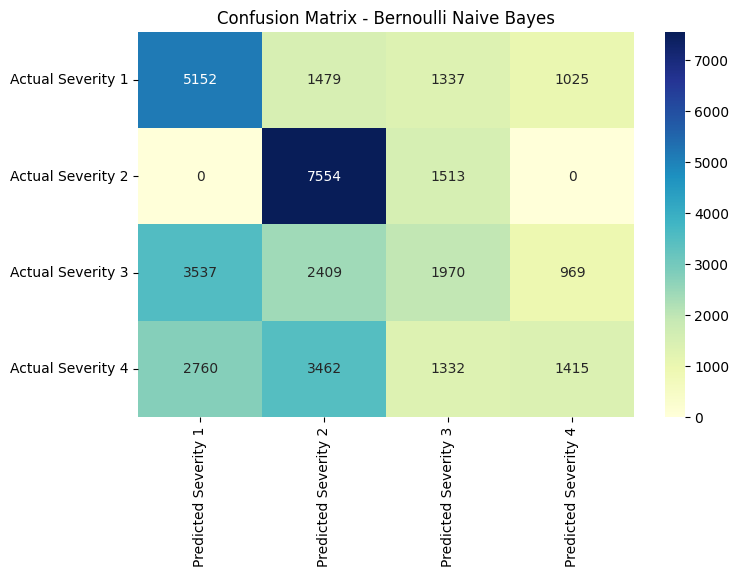

In [37]:
y_pred = bnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.show()

## Algorithm Evaluation - Bernoulli Naive Bayes

In [38]:
y_pred = bnb.predict(X_validate)

accuracy["Bernoulli Naive Bayes"] = accuracy_score(y_validate, y_pred)
f1["Bernoulli Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, bnb.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51     20965
           1       0.50      0.83      0.63     20803
           2       0.32      0.22      0.26     21013
           3       0.43      0.17      0.24     21016

    accuracy                           0.45     83797
   macro avg       0.43      0.45      0.41     83797
weighted avg       0.43      0.45      0.41     83797

              precision    recall  f1-score   support

           0       0.45      0.57      0.50      8993
           1       0.51      0.83      0.63      9067
           2       0.32      0.22      0.26      8885
           3       0.42      0.16      0.23      8969

    accuracy                           0.45     35914
   macro avg       0.42      0.45      0.41     35914
weighted avg       0.42      0.45      0.41     35914



In [39]:
print(classification_report(y_train, bnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51     20965
           1       0.50      0.83      0.63     20803
           2       0.32      0.22      0.26     21013
           3       0.43      0.17      0.24     21016

    accuracy                           0.45     83797
   macro avg       0.43      0.45      0.41     83797
weighted avg       0.43      0.45      0.41     83797



In [40]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.57      0.50      8993
           1       0.51      0.83      0.63      9067
           2       0.32      0.22      0.26      8885
           3       0.42      0.16      0.23      8969

    accuracy                           0.45     35914
   macro avg       0.42      0.45      0.41     35914
weighted avg       0.42      0.45      0.41     35914



### Accuracy -  Bernoulli Naive Bayes

In [41]:
accuracy["Bernoulli Naive Bayes"] = accuracy_score(y_validate, y_pred)
print("Accuracy - Bernoulli Naive Bayes: ", accuracy["Bernoulli Naive Bayes"])

Accuracy - Bernoulli Naive Bayes:  0.44804254608230776


### F1-Score - Recall - Precision - Bernoulli Naive Bayes

In [42]:
f1["Bernoulli Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - Bernoulli Naive Bayes: ", f1["Bernoulli Naive Bayes"])
print("precision - Bernoulli Naive Bayes: ", precisionScore)
print("recall - Bernoulli Naive Bayes: ", recallScore)

f1-Score - Bernoulli Naive Bayes:  0.40624340670521736
precision - Bernoulli Naive Bayes:  0.4230345587136483
recall - Bernoulli Naive Bayes:  0.4463772002578634


Draw PR (Precision - Recall) Curve - Bernoulli Naive Bayes

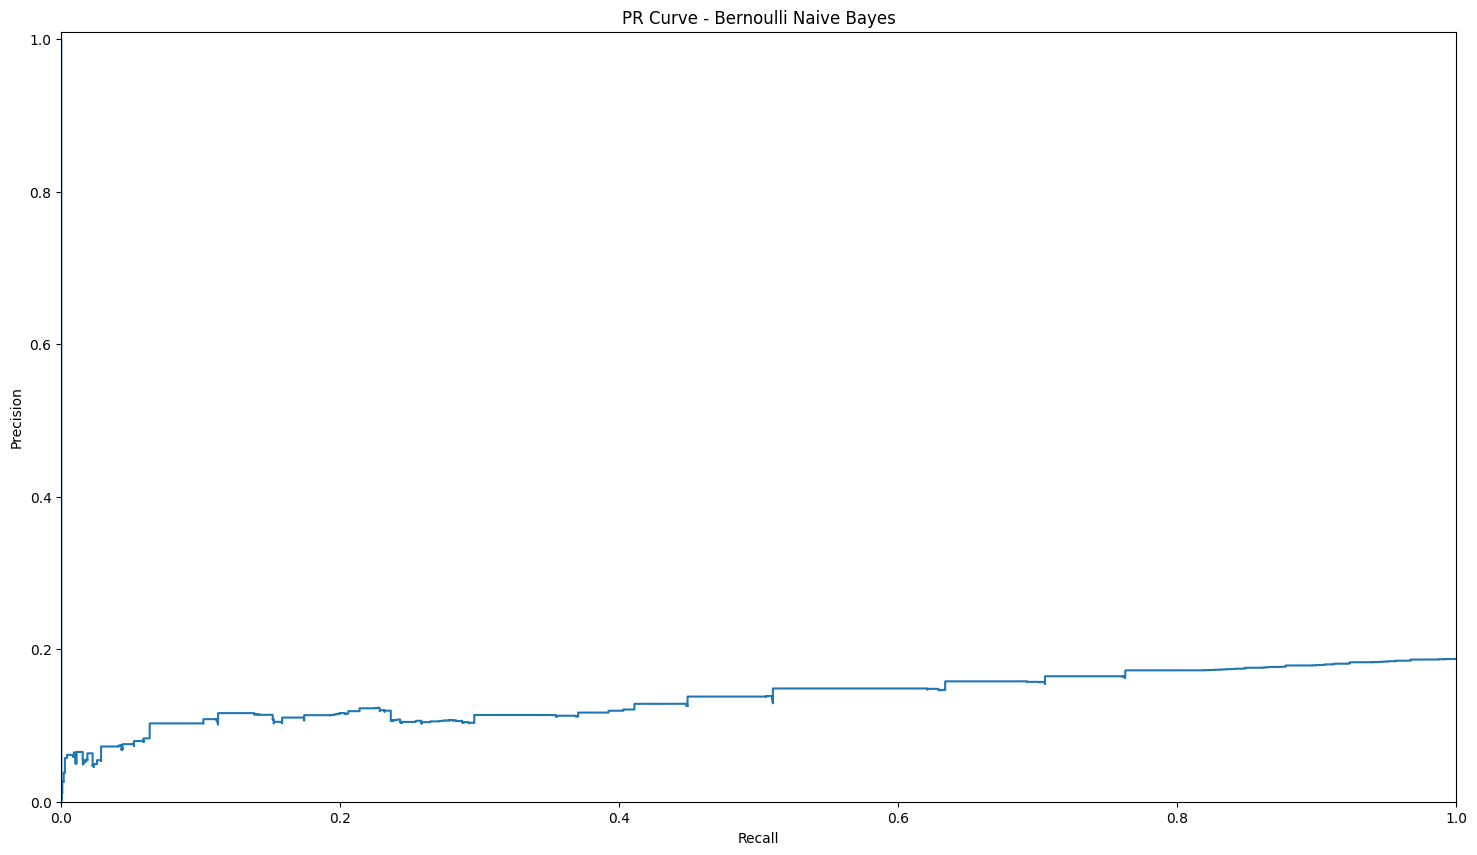

In [43]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = bnb.predict_proba(X_validate)

precision["Bernoulli Naive Bayes"], recall["Bernoulli Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Bernoulli Naive Bayes"], precision["Bernoulli Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Bernoulli Naive Bayes")
plt.show()

### ROC curve - Bernoulli Naive Bayes

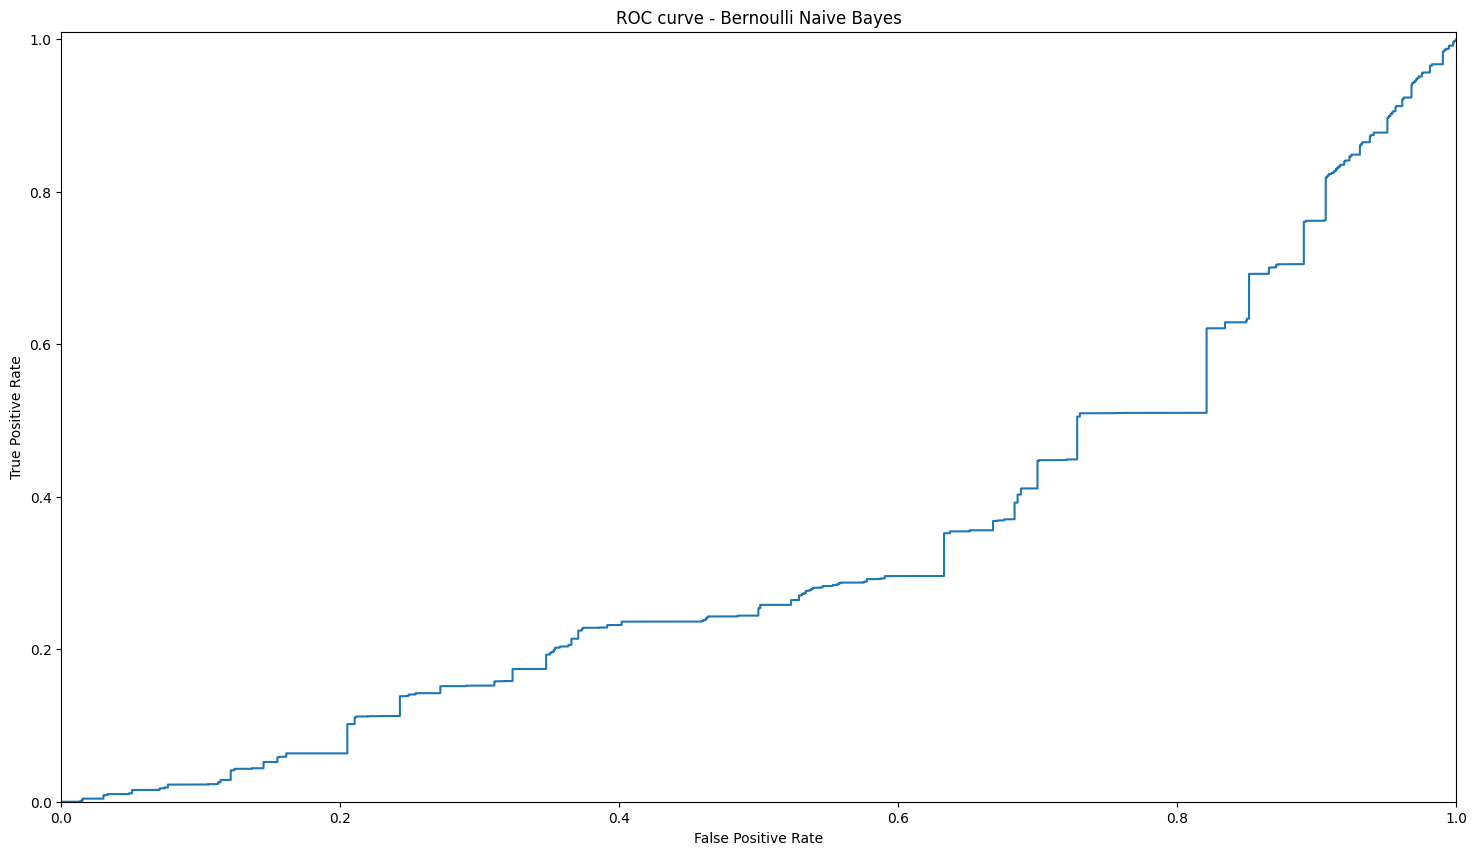

In [44]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = bnb.predict_proba(X_validate)

fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], where="post")

plt.title("ROC curve - Bernoulli Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

# Random Forest

# Giới thiệu

Thuật toán Random Forest là một kỹ thuật học máy phổ biến được sử dụng cho cả các nhiệm vụ phân loại và hồi quy. Đây là phương pháp học tập tổng hợp, kết hợp các dự đoán của nhiều cây quyết định để tạo ra dự đoán cuối cùng. Random Forest được biết đến với độ mạnh và độ chính xác cao, khiến chúng được sử dụng rộng rãi trong các lĩnh vực khác nhau, bao gồm tài chính, chăm sóc sức khỏe và xử lý ngôn ngữ tự nhiên.

Một trong những ưu điểm của Random Forest là khả năng xử lý các tập dữ liệu lớn với nhiều chiều. Chúng cũng ít bị quá khớp (overfitting) hơn so với các cây quyết định riêng lẻ. Ngoài ra, Random Forest có thể cung cấp các phép đo về tầm quan trọng của đặc trưng, cho phép chúng tôi xác định các đặc trưng có ảnh hưởng lớn nhất trong tập dữ liệu.

Tuy nhiên, cần lưu ý rằng Random Forests có thể tốn nhiều thời gian tính toán, đặc biệt là khi xử lý một số lượng lớn cây hoặc tập dữ liệu phức tạp. Ngoài ra, chúng có thể không hoạt động tốt trên các tập dữ liệu có mối quan hệ tuyến tính mạnh, vì cây quyết định không phải lúc nào cũng phù hợp để nắm bắt các mẫu mẫu này. Tổng thể, thuật toán Random Forest là một kỹ thuật mạnh mẽ và linh hoạt cho các nhiệm vụ học máy, cung cấp một sự cân bằng tốt giữa độ chính xác, khả năng giải thích và tính ổn định.

# Lý do chọn thuật toán


Phù hợp với bài toán:
Với bài toán dự đoán mức độ nghiêm trọng của tai nạn (Accident Severity), Random Forest là một lựa chọn phù hợp. Thuật toán này có khả năng xử lý cả bài toán phân loại và có thể xử lý các bộ dữ liệu lớn, đa chiều như bộ dữ liệu bạn cung cấp.

Đa dạng đặc trưng: Bộ dữ liệu có nhiều đặc trưng (features) như Day_of_Week, Junction_Control, Latitude, Light_Conditions, và Weather_Conditions, làm cho Random Forest phù hợp vì nó có khả năng làm việc tốt với các tập dữ liệu có nhiều đặc trưng.

Khả năng xử lý dữ liệu thiếu và nhiễu: Random Forest có khả năng xử lý dữ liệu thiếu và nhiễu, làm cho nó thích hợp với bộ dữ liệu có thể chứa các giá trị thiếu hoặc nhiễu.

Khả năng đánh giá đặc trưng quan trọng: Random Forest cung cấp các phương pháp để đánh giá đặc trưng quan trọng trong dự đoán, giúp hiểu rõ hơn về tác động của từng đặc trưng đối với kết quả dự đoán.

Tính ổn định và chính xác: Random Forest thường cho ra kết quả ổn định và chính xác trên các tập dữ liệu lớn và có tính phân tán cao như bộ dữ liệu bạn cung cấp.

In [45]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validate score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters scores:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.9999880663985584
Validate score: 0.9776967199420838


In [46]:
print("Default scores:")
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validate score:", rfc.score(X_validate, y_validate))

Default scores:
Train score: 0.9999880663985584
Validate score: 0.9749122904716824


In [47]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,31.272354,0.180141,0.829902,0.143294,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.966289,0.962888,0.962170,0.963244,0.962349,0.963388,0.001500,1
14,15.238097,1.940897,5.576343,0.644590,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.965990,0.960919,0.961513,0.962468,0.960678,0.962314,0.001939,2
13,8.657783,2.690157,3.215426,2.547962,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.964618,0.959487,0.960320,0.960857,0.960260,0.961108,0.001808,3
12,9.452176,0.924838,4.467742,0.585345,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.959069,0.955967,0.957038,0.958291,0.954950,0.957063,0.001497,4
11,30.013468,0.168987,2.058098,0.091613,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.912947,0.912112,0.911868,0.914911,0.914016,0.913171,0.001150,5
9,9.180822,3.010677,2.283114,3.134973,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.914200,0.909785,0.909481,0.915747,0.911689,0.912181,0.002452,6
10,14.009832,0.631220,5.584617,0.196735,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.913305,0.911098,0.910615,0.914553,0.910914,0.912097,0.001555,7
8,8.462267,1.208285,4.498633,1.119968,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.911277,0.909487,0.909064,0.912704,0.911988,0.910904,0.001410,8
7,24.468279,1.622590,2.301235,1.388091,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.786516,0.784845,0.790322,0.786025,0.790262,0.787594,0.002269,9
6,10.328979,1.233949,4.698561,0.714806,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.785621,0.786874,0.789128,0.785309,0.787159,0.786818,0.001354,10


Confusion Matrix:
 [[8993    0    0    0]
 [   0 9067    0    0]
 [   2    0 8532  351]
 [  12    0  536 8421]]


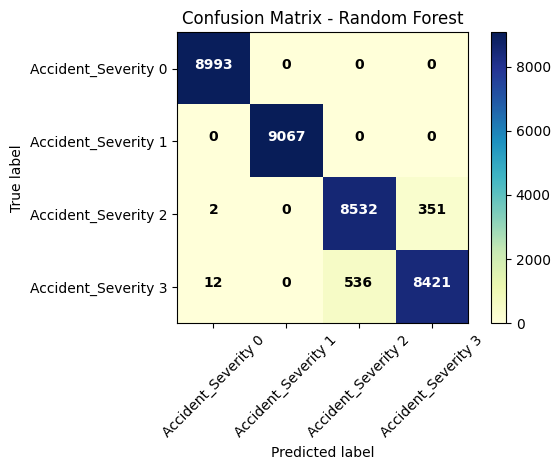

In [48]:



y_pred = rfc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

# In ra confusion matrix
print("Confusion Matrix:\n", confmat)

sum_per_class = confmat.sum(axis=1, keepdims=True)

# Chuẩn hóa confusion matrix để có các giá trị nằm trong phạm vi [0, 1]
confmat_normalized = confmat.astype('float') / sum_per_class

# Vẽ confusion matrix bằng matplotlib và hiển thị số trên mỗi ô
plt.imshow(confmat, interpolation='nearest', cmap='YlGnBu')
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()

# Thêm số vào từng ô, màu sắc số hiển thị theo phân lớp
for i in range(len(confmat_normalized)):
    for j in range(len(confmat_normalized[i])):
        color = "white" if confmat_normalized[i][j] > (confmat_normalized.max() / 2) else "black"
        plt.text(j, i, format(confmat[i][j], 'd'), horizontalalignment="center", color=color, fontweight='bold')

# Tên cột
tick_marks = np.arange(len(confmat_normalized))
plt.xticks(tick_marks, ["Accident_Severity 0", "Accident_Severity 1", "Accident_Severity 2", "Accident_Severity 3"], rotation=45)
plt.yticks(tick_marks, ["Accident_Severity 0", "Accident_Severity 1", "Accident_Severity 2", "Accident_Severity 3"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


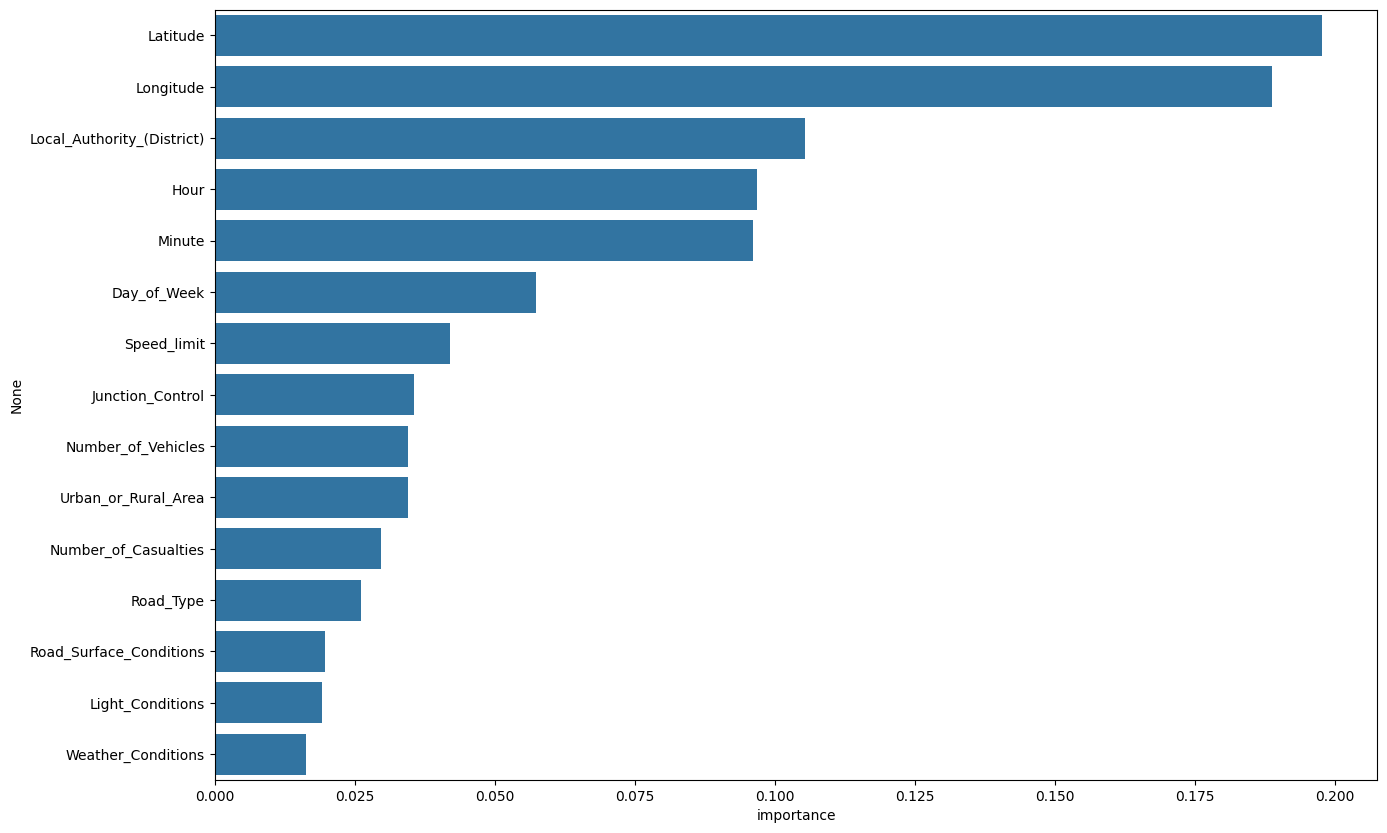

In [49]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:15]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

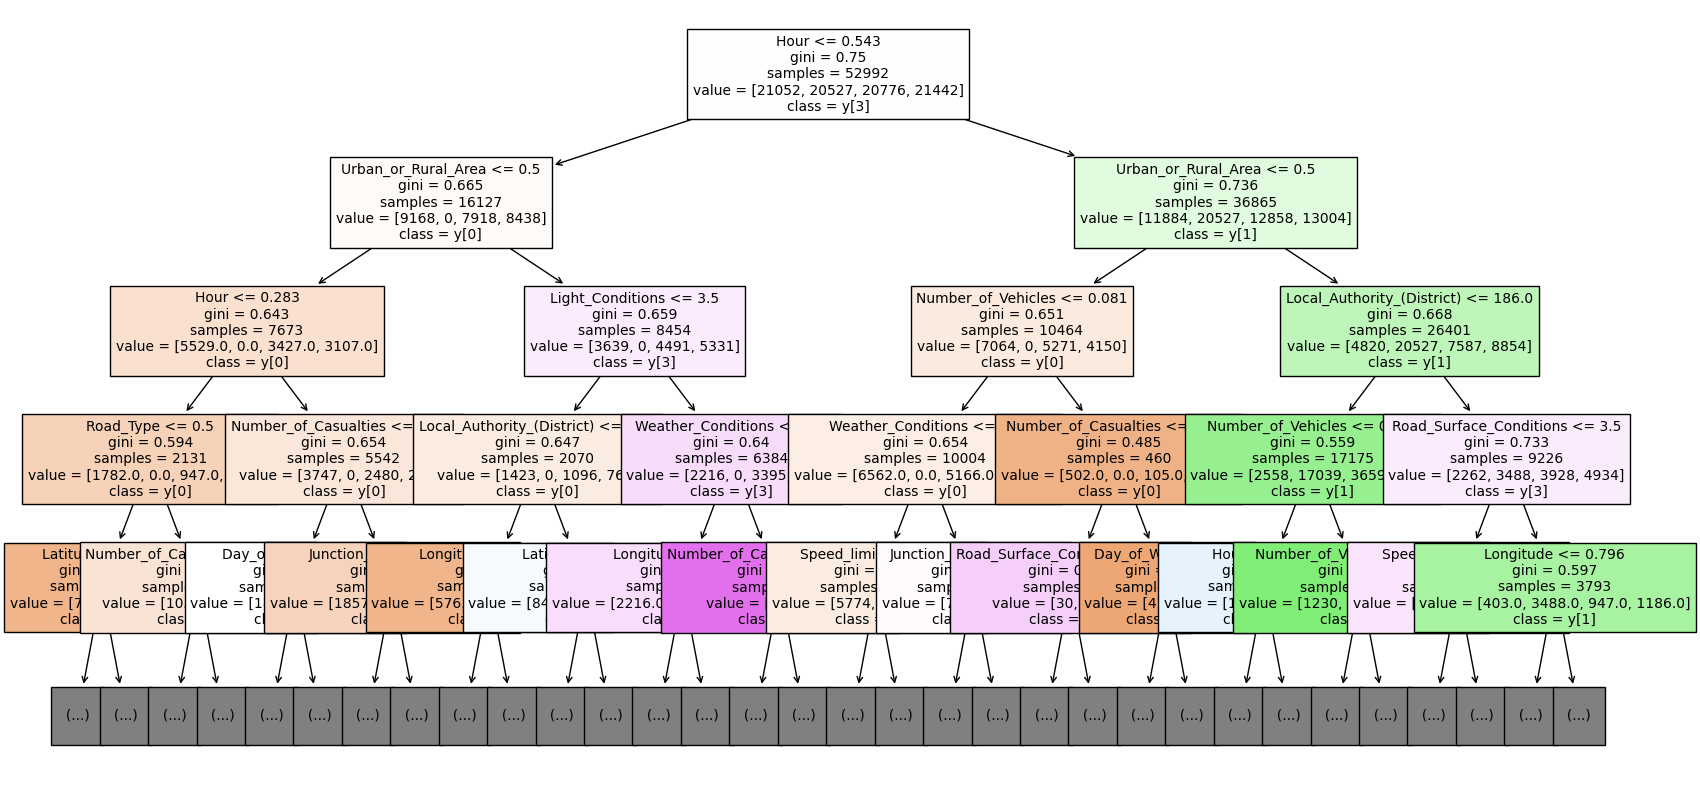

In [50]:
tree = rfc.estimators_[0]

fig, ax = plt.subplots(figsize=(20,10))

plot_tree(tree, max_depth=4, fontsize = 10, feature_names = X_train.columns.to_list(), class_names = True , filled =True)
plt.show()

## Đánh giá thuật toán

In [51]:
y_pred = rfc.predict(X_validate)

accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
f1["Random Forest"] = f1_score(y_validate, y_pred, average="macro")



In [52]:
print(classification_report(y_train, rfc.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20965
           1       1.00      1.00      1.00     20803
           2       1.00      1.00      1.00     21013
           3       1.00      1.00      1.00     21016

    accuracy                           1.00     83797
   macro avg       1.00      1.00      1.00     83797
weighted avg       1.00      1.00      1.00     83797



In [53]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8993
           1       1.00      1.00      1.00      9067
           2       0.94      0.96      0.95      8885
           3       0.96      0.94      0.95      8969

    accuracy                           0.97     35914
   macro avg       0.97      0.97      0.97     35914
weighted avg       0.97      0.97      0.97     35914



### Accuracy 

In [54]:
accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
print("accuracy - Random Forest: ", accuracy["Random Forest"])

accuracy - Random Forest:  0.9749122904716824


### F1-Score - Recall - Precision - Random Forest

In [55]:
f1["Random Forest"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - Random Forest: ", f1["Random Forest"])
print("precision - Random Forest: ", precisionScore)
print("recall - Random Forest: ", recallScore)

f1-Score - Random Forest:  0.9747576137190133
precision - Random Forest:  0.9748307547311595
recall - Random Forest:  0.9747926939995217


### Draw PR (Precision - Recall) Curve - random forest

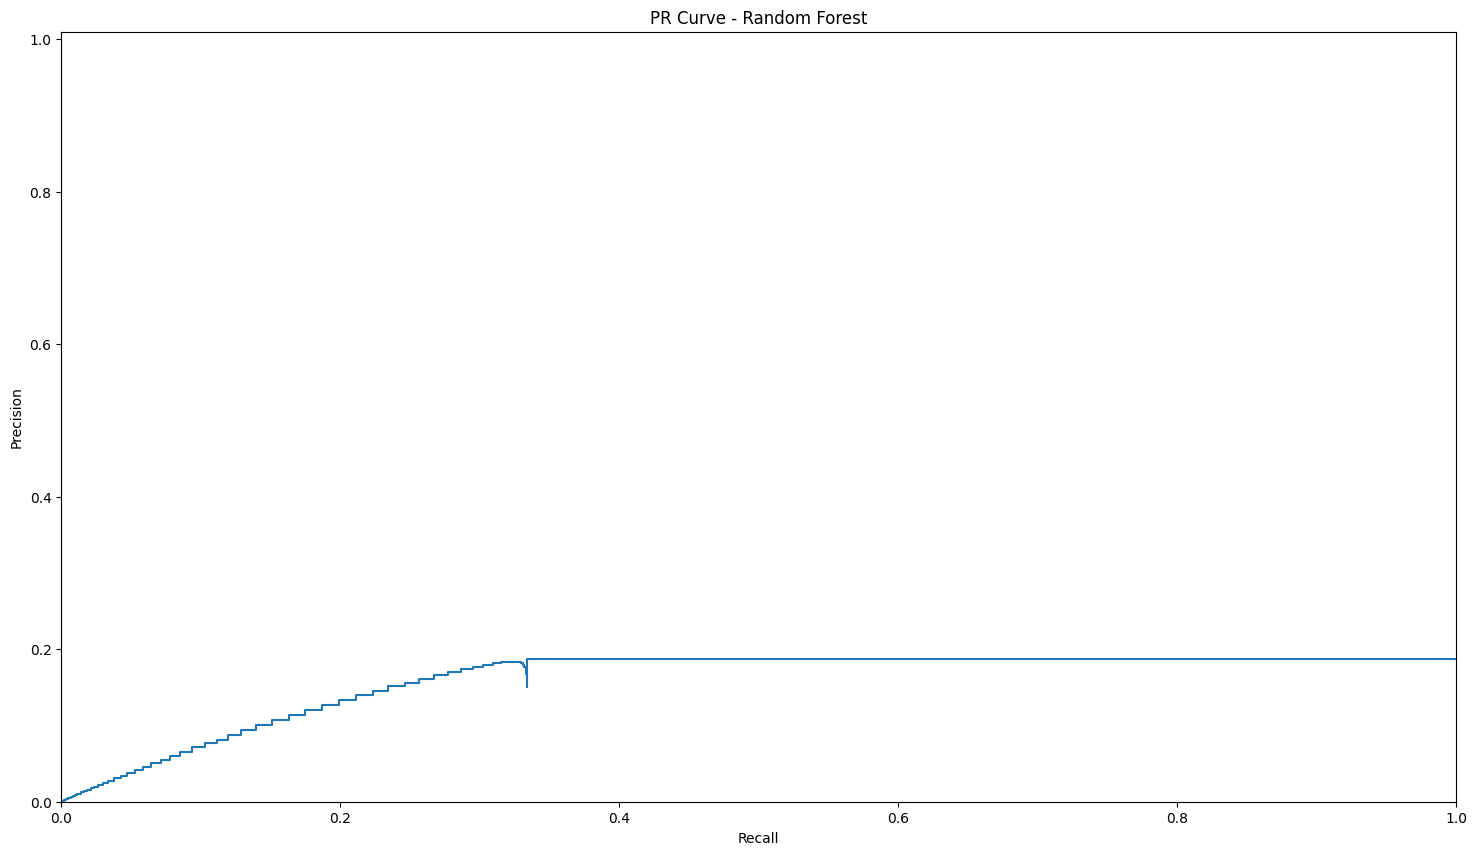

In [56]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = rfc.predict_proba(X_validate)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

### ROC curve - Random Forest

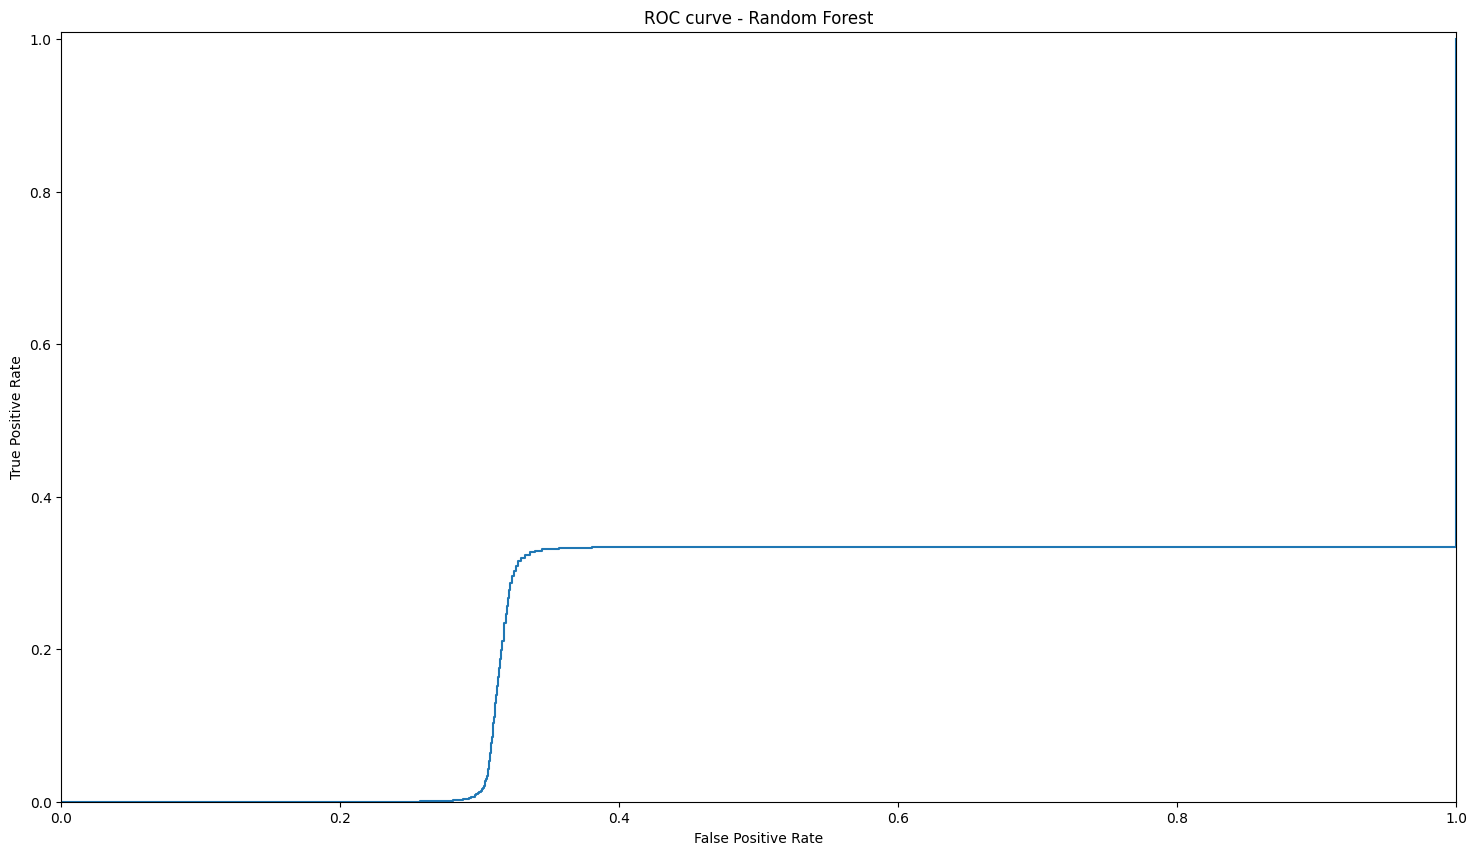

In [57]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = rfc.predict_proba(X_validate)
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

# KNN

In [58]:
scaler = StandardScaler(with_mean=False) 
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
print(X_train.shape)
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, y_train)

(83797, 15)


KNeighborsClassifier()

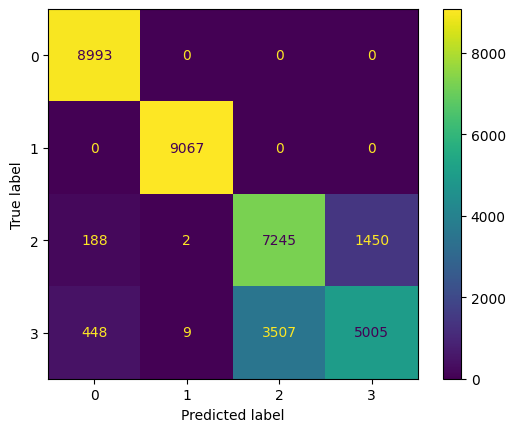

In [59]:
y_pred = kNN.predict(X_validate)
# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(kNN, X_validate, y_validate)

In [60]:
features = ['Day_of_Week', 'Junction_Control','Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Longitude','Number_of_Casualties'
            ,'Number_of_Vehicles','Speed_limit','Urban_or_Rural_Area', 'Hour',   'Minute',
            'Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions']

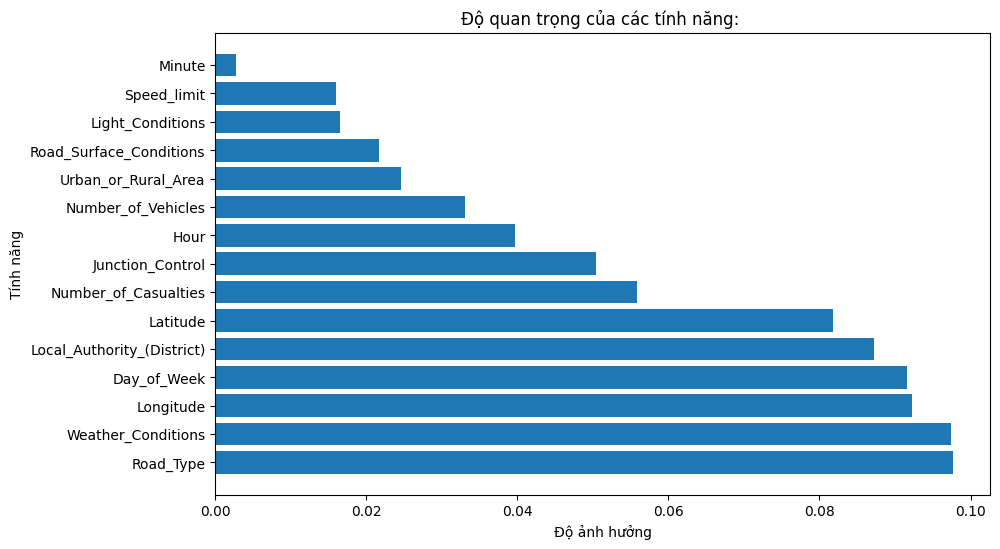

In [61]:
# Tính toán trung bình giá trị của các đặc trưng tương ứng với các láng giềng
avg_neighbor_values = []

for sample in X_validate:
    # Tìm các láng giềng gần nhất
    _, indices = kNN.kneighbors(sample.reshape(1, -1))
    # Tính toán giá trị trung bình của các đặc trưng cho các láng giềng
    avg_neighbors = np.mean(X_train[indices[0]], axis=0)
    avg_neighbor_values.append(avg_neighbors)

# Tính toán độ lệch giữa giá trị của mẫu kiểm tra và giá trị trung bình của láng giềng
feature_impact = np.mean(np.abs(X_validate - np.array(avg_neighbor_values)), axis=0)

# Sắp xếp các tính năng theo độ ảnh hưởng
sorted_features = sorted(zip(features, feature_impact), key=lambda x: x[1], reverse=True)
sorted_feature_names = [x[0] for x in sorted_features]
sorted_feature_impact = [x[1] for x in sorted_features]

# Vẽ biểu đồ cột đã sắp xếp
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_impact)
plt.xlabel('Độ ảnh hưởng')
plt.ylabel('Tính năng')
plt.title('Độ quan trọng của các tính năng: ')
plt.show()

In [62]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
y_pred = kNN.predict(X_validate)
accuracy["KNN"] = accuracy_score(y_validate, y_pred)
f1["KNN"] = f1_score(y_validate, y_pred, average="macro")
print("Classification report trên tập huấn luyện:")
print(classification_report(y_train, kNN.predict(X_train)))
print("Classification report trên tập kiểm tra:")
print(classification_report(y_validate, y_pred))

Classification report trên tập huấn luyện:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20965
           1       1.00      1.00      1.00     20803
           2       0.77      0.92      0.84     21013
           3       0.91      0.68      0.78     21016

    accuracy                           0.90     83797
   macro avg       0.91      0.90      0.90     83797
weighted avg       0.91      0.90      0.90     83797

Classification report trên tập kiểm tra:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8993
           1       1.00      1.00      1.00      9067
           2       0.67      0.82      0.74      8885
           3       0.78      0.56      0.65      8969

    accuracy                           0.84     35914
   macro avg       0.85      0.84      0.84     35914
weighted avg       0.85      0.84      0.84     35914



In [63]:
accuracy["KNN"] = accuracy_score(y_validate, y_pred)
print("Accuracy - KNN: ", accuracy["KNN"])

Accuracy - KNN:  0.8439605724786992


In [64]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
f1["KNN"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - KNN: ", f1["KNN"])
print("precision - KNN: ", precisionScore)
print("recall - KNN: ", recallScore)

f1-Score - KNN:  0.8380304907226753
precision - KNN:  0.845483465915394
recall - KNN:  0.8433631178686946


In [65]:
precision_recall_curve(Y.ravel(), y_score.ravel())

(array([1.87399064e-01, 1.49939964e-01, 1.60790704e-01, 1.68076822e-01,
        1.68083115e-01, 1.73187916e-01, 1.76949045e-01, 1.79474308e-01,
        1.81392413e-01, 1.81396107e-01, 1.82790381e-01, 1.83630531e-01,
        1.83638182e-01, 1.83709131e-01, 1.83029170e-01, 1.81709171e-01,
        1.79868841e-01, 1.77135651e-01, 1.74192983e-01, 1.70379037e-01,
        1.70360722e-01, 1.66236540e-01, 1.61405398e-01, 1.56344787e-01,
        1.51435614e-01, 1.45182112e-01, 1.39815934e-01, 1.39795942e-01,
        1.33424130e-01, 1.27016129e-01, 1.20406305e-01, 1.13899240e-01,
        1.07251051e-01, 1.07229239e-01, 1.00535631e-01, 1.00513428e-01,
        9.37515571e-02, 9.37289782e-02, 8.71958576e-02, 8.14144945e-02,
        7.65778401e-02, 7.11753827e-02, 7.11772110e-02, 6.53907909e-02,
        6.53665864e-02, 6.53423806e-02, 5.98810207e-02, 5.49280235e-02,
        5.07623603e-02, 4.61575255e-02, 4.61321783e-02, 4.21151021e-02,
        3.82777688e-02, 3.41169802e-02, 3.40909091e-02, 3.406483

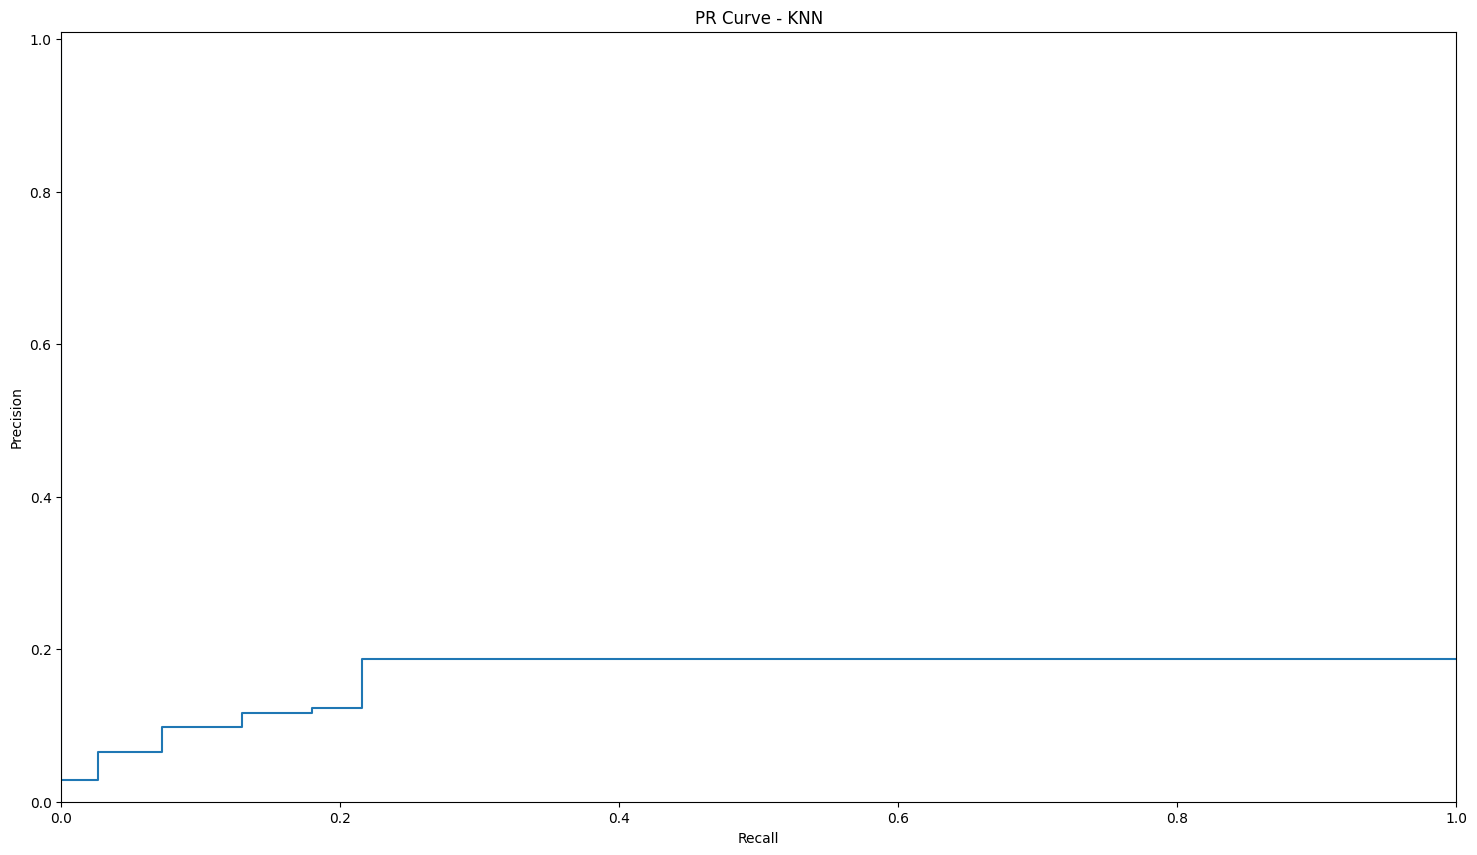

In [66]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = kNN.predict_proba(X_validate)
precision["KNN"], recall["KNN"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["KNN"], tpr["KNN"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["KNN"], precision["KNN"], where="post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - KNN")
plt.show()

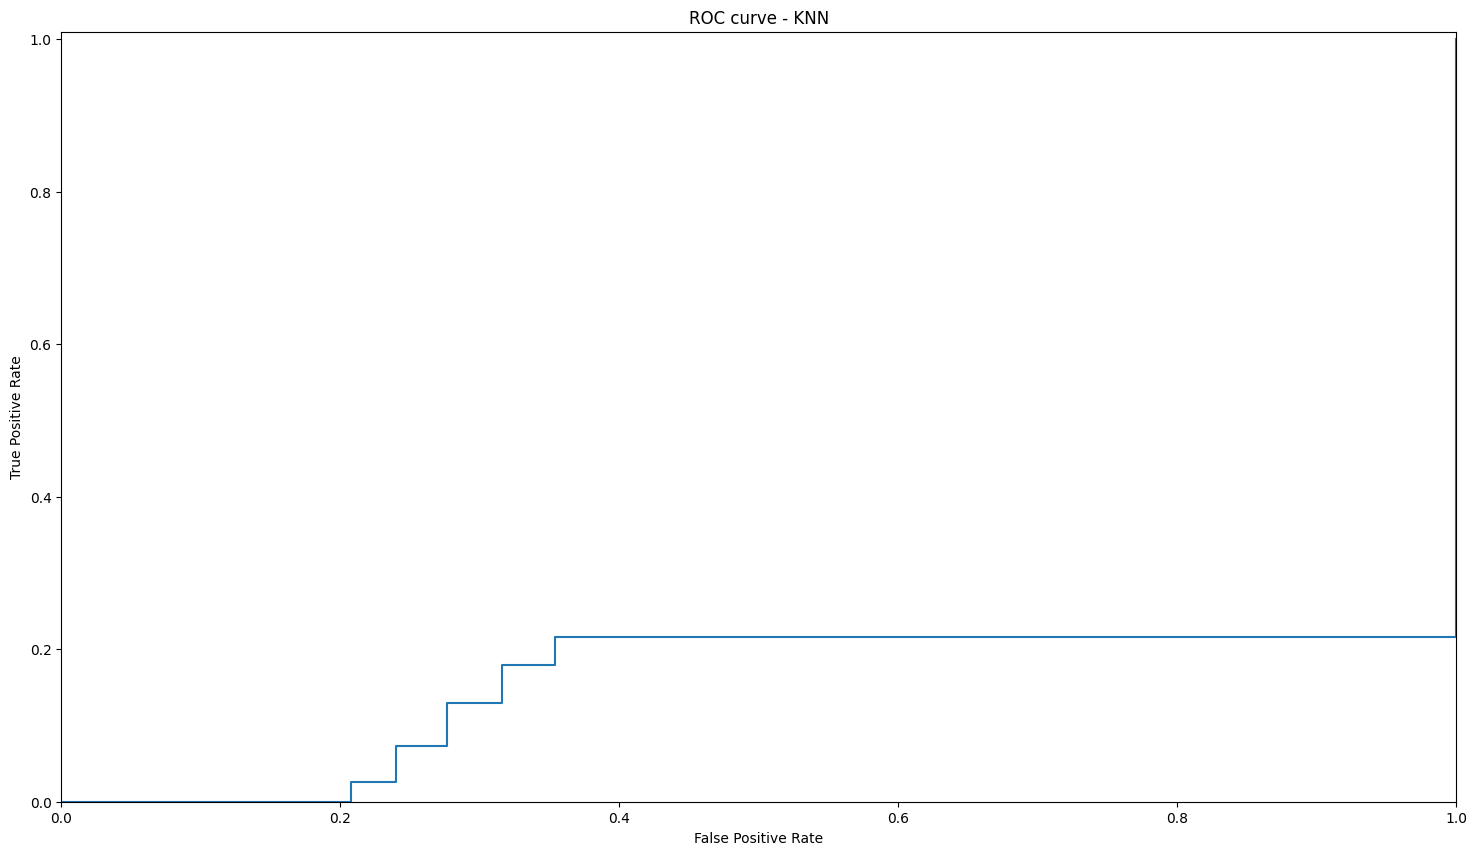

In [67]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = kNN.predict_proba(X_validate)
fpr["KNN"], tpr["KNN"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["KNN"], tpr["KNN"], where="post")

plt.title("ROC curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

# 4. PREDICTING

## 4.1. Algorithm Evaluation

### Accuracy

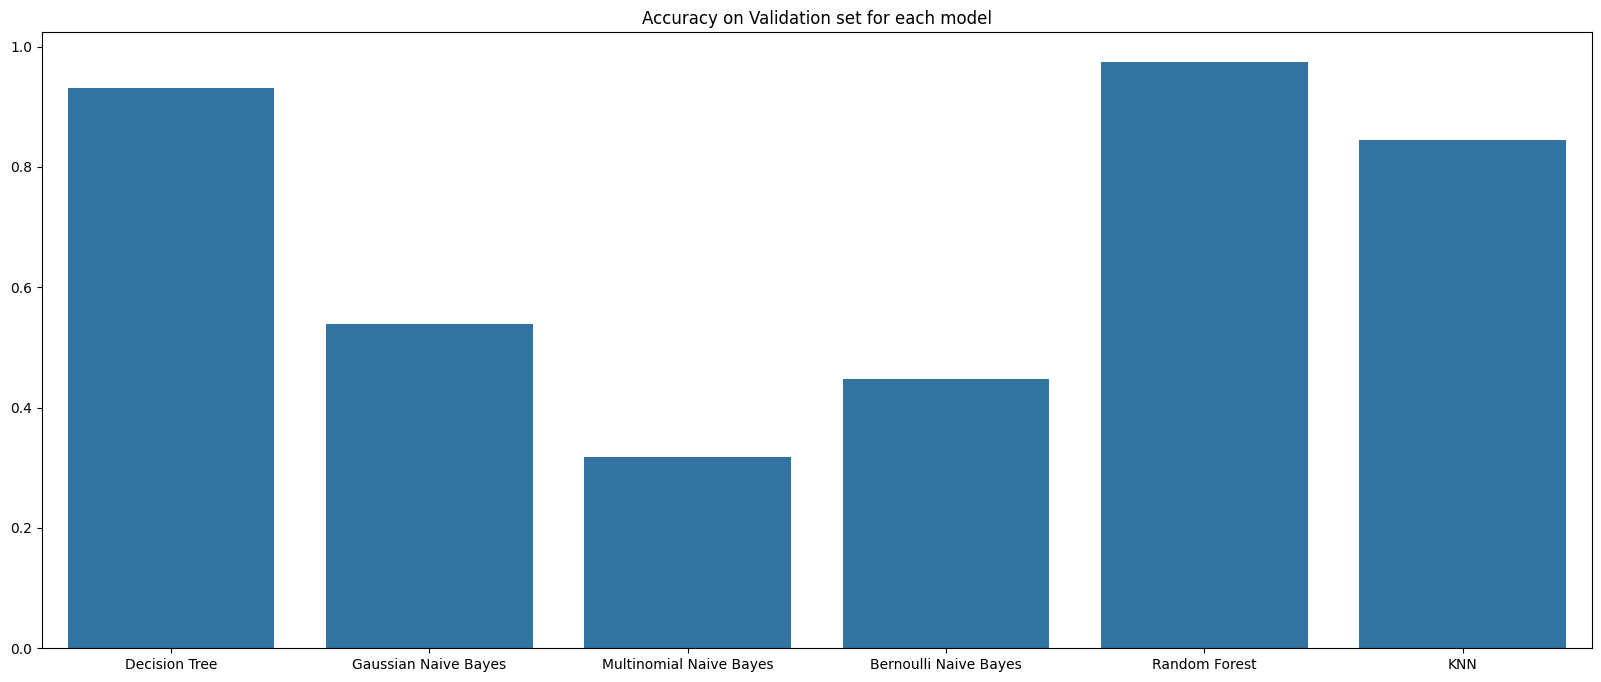

In [68]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(x = list(range(len(accuracy))), y = list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

### F1 Score

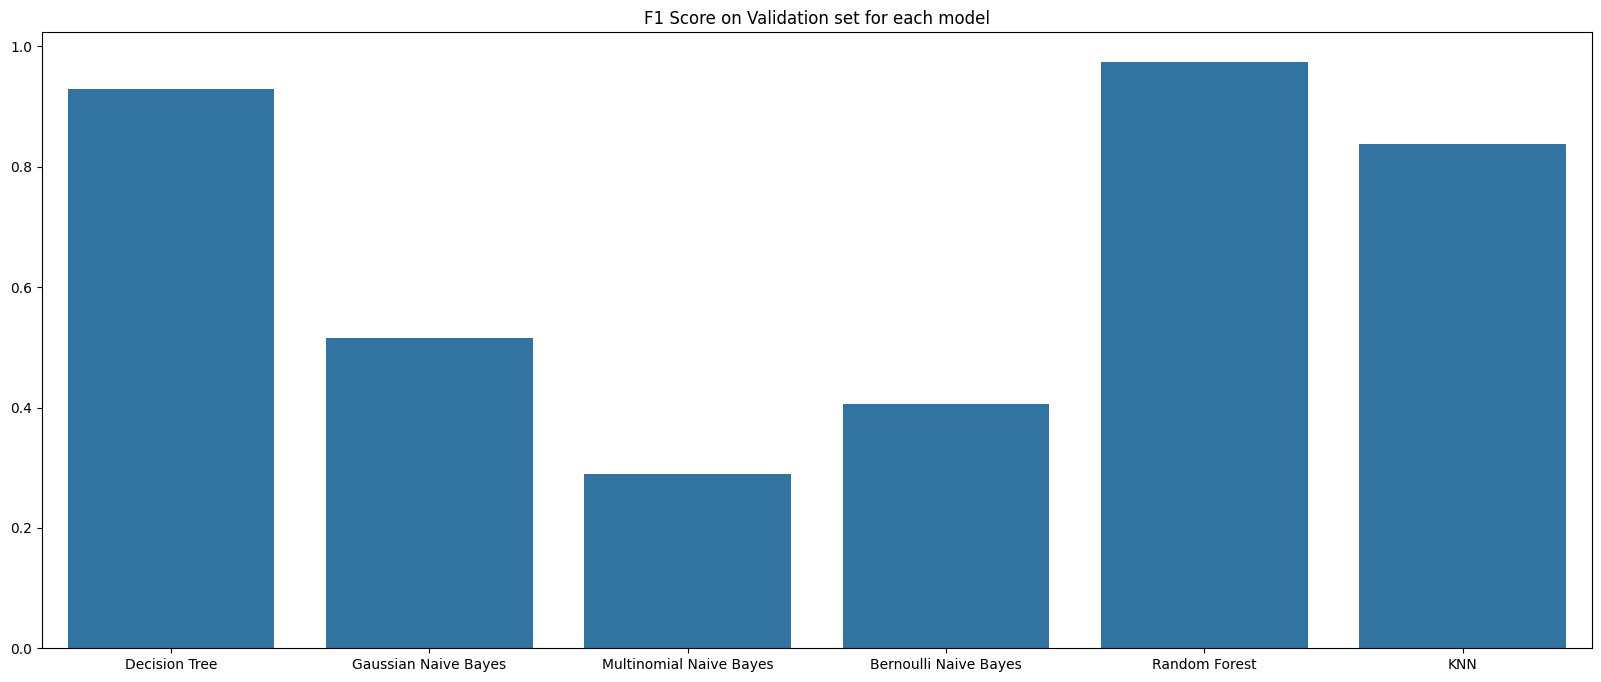

In [69]:
plt.figure(figsize=(20, 8))
plt.title("F1 Score on Validation set for each model")
sns.barplot(x =list(range(len(f1))), y =list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

### Recall - Precision

In [70]:
recall

{'Decision Tree': array([1.        , 0.07410572, 0.07410572, 0.07406857, 0.        ]),
 'Gaussian Naive Bayes': array([1.        , 0.76880502, 0.76880502, ..., 0.        , 0.        ,
        0.        ]),
 'Multinomial Naive Bayes': array([1.        , 0.99992571, 0.99992571, ..., 0.        , 0.        ,
        0.        ]),
 'Bernoulli Naive Bayes': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.71457227e-05, 0.00000000e+00, 0.00000000e+00]),
 'Random Forest': array([1.00000000e+00, 3.33977193e-01, 3.33568590e-01, 3.33531444e-01,
        3.33531444e-01, 3.33271424e-01, 3.32937112e-01, 3.32008469e-01,
        3.30894098e-01, 3.30894098e-01, 3.29519706e-01, 3.27439545e-01,
        3.27439545e-01, 3.24133576e-01, 3.20010401e-01, 3.15218603e-01,
        3.09721036e-01, 3.02626203e-01, 2.95457078e-01, 2.86690688e-01,
        2.86653542e-01, 2.77552840e-01, 2.67226329e-01, 2.56565506e-01,
        2.46461870e-01, 2.33943761e-01, 2.23468668e-01, 2.23431522e-01,
       

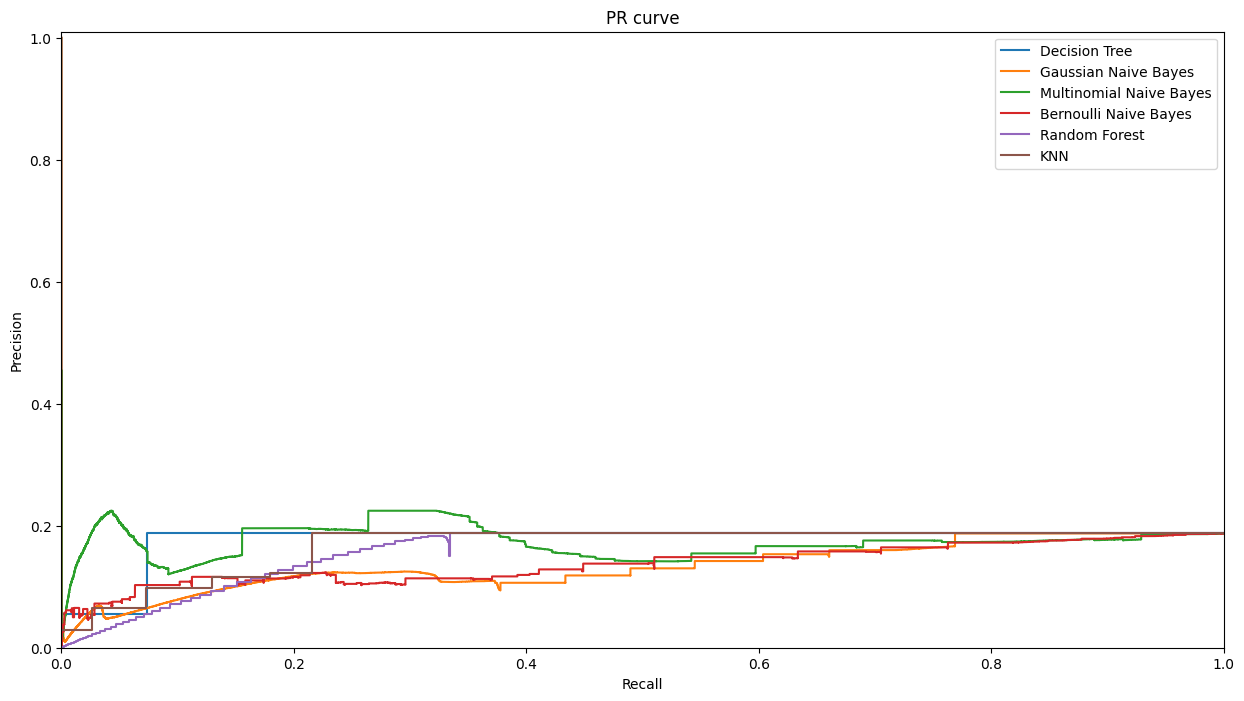

In [71]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.show()

### ROC curve

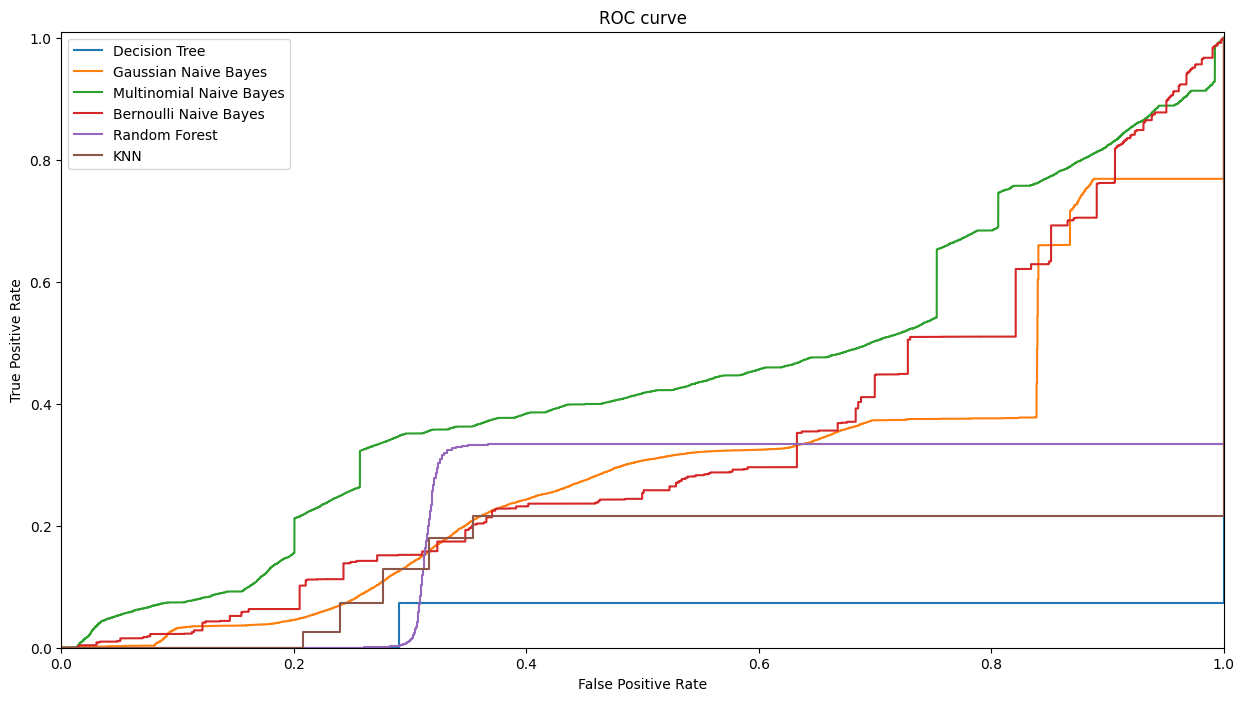

In [72]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.show()

## Predict - Using random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       1.00      1.00      1.00     12884
           2       0.94      0.96      0.95     12856
           3       0.96      0.94      0.95     12769

    accuracy                           0.97     51305
   macro avg       0.97      0.97      0.97     51305
weighted avg       0.97      0.97      0.97     51305



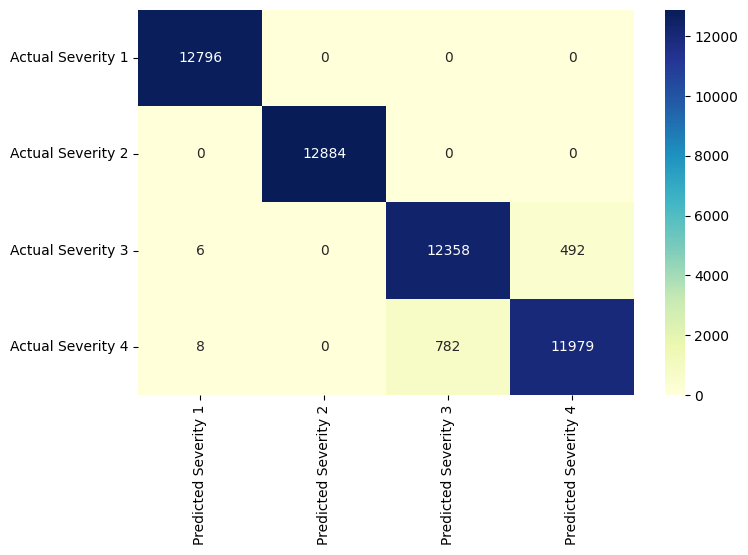

In [73]:
sample = X_test
y_test_sample = sample["Accident_Severity"]
X_test_sample = sample.drop("Accident_Severity", axis=1)

y_pred = rfc.predict(X_test_sample)

print(classification_report(y_test_sample, y_pred))

confmat = confusion_matrix(y_true=y_test_sample, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()